In [1]:
import numpy as np
import pandas as pd
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import tokenizer_from_json

sequence_length = 13
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/model_llm.keras"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/texts_test.csv"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/tokenizer_config.json"
# /content/drive/MyDrive/metar/LECOmodel_llm.keras
#/content/drive/MyDrive/metar/LECOtokenizer_config.json
#/content/drive/MyDrive/Colab Notebooks/gpt/LECO/texts_test.csv

model_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LECO/LECOmodel.keras"
texts_test_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LECO/LECOtexts_test.csv"
tokenizer_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LECO/LECOtokenizer_config.json"
result_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LECO/LECOresult.csv"

model = load_model(model_path)
texts_test = pd.read_csv(texts_test_path, index_col="time").squeeze()

# Load the JSON configuration from the file
with open(tokenizer_path, 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)

# Rebuild tokenizer from the JSON configuration
tokenizer = tokenizer_from_json(tokenizer_json)

In [2]:
#@title Get: X test, Y test and y_pred

sample = 300

# Function to generate text
def generate_text(seed_text, next_words=6):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_probs = model.predict(token_list,verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        predicted_word = tokenizer.index_word[predicted_index]
        seed_text += " " + predicted_word
    return seed_text

def get_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Join the first n words back into a string
    return ' '.join(words[:n])

def delete_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Remove the first n words
    del words[:n]
    # Join the remaining words back into a string
    return ' '.join(words)

def delete_words_beyond_nosig(input_string):
    # Split the string into words
    words = input_string.split()
    # Find the index of "nosig" if it exists
    try:
        index_nosig = words.index("nosig")
    except ValueError:
        # If "nosig" is not found, return the original string
        return input_string
    # Keep only the words before "nosig"
    return ' '.join(words[:index_nosig + 1])


text_test = texts_test.sample(sample)

#texts_test.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt/Levx/texts_test")

all_for_text = []
y_test = []
y_pred = []

for i in range(len(text_test)):
  all_for_text.append(generate_text(get_first_n_words(text_test[i],8),11))
  y_test.append(delete_first_n_words(text_test[i], 8))
  y_pred.append(delete_words_beyond_nosig(delete_first_n_words(all_for_text[i], 8)))

result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"all":all_for_text})
result.index=text_test.index
result.to_csv(result_path)
result
for ind in range(0,len(result)):
  display(result.iloc[ind]["y_test"])
  display(result.iloc[ind]["y_pred"])
  display(result.iloc[ind]["all"])
  #display(result.iloc[ind]["all"])
  print("*********")

'18006KT CAVOK 06/04 Q1024'

'18005kt 150v210 cavok 08 00 q1025 nosig'

'15007kt 9999 prec0n CL0 CM0 09 04 q1025 18005kt 150v210 cavok 08 00 q1025 nosig bkn010 sct030tcu 08 08'

*********


'32016G28KT 290V020 7000 -SHRA FEW015 FEW020TCU BKN030 15/12 Q1013 TEMPO 4000 SHRA'

'33013kt 290v020 2200 ra br sct022 bkn023 14 13 q1013 tempo'

'30015kt 8000 prec0y CL8 CM8 15 13 q1012 33013kt 290v020 2200 ra br sct022 bkn023 14 13 q1013 tempo'

*********


'16004KT 130V240 9999 NCD 14/12 Q1016'

'17005kt 9999 bkn032 14 13 q1016 nosig'

'19005kt 9999 prec0n CL0 CM0 13 12 q1016 17005kt 9999 bkn032 14 13 q1016 nosig nosig vv001 15 13'

*********


'36008KT 330V050 9000 BKN012 17/16 Q1019'

'36005kt 320v050 9999 few006 ovc018 17 16 q1019 tempo 4000 br'

'36005kt 500 prec0n CL4 CM0 15 15 q1019 36005kt 320v050 9999 few006 ovc018 17 16 q1019 tempo 4000 br'

*********


'VRB02KT 9999 FEW030 16/14 Q1021 NOSIG'

'vrb01kt 9999 4800n ra few037 12 10 q1020 tempo 3000 shra'

'32001kt 9999 prec0n CL1 CM0 12 12 q1021 vrb01kt 9999 4800n ra few037 12 10 q1020 tempo 3000 shra'

*********


'18004KT 0150 R21/0700D R03/0450N FG VV001 03/03 Q1019 TEMPO 1500 BCFG'

'16004kt 4700 br sct025 sct031 ovc040 08 08 q1021 tempo 3000'

'16003kt 9999 prec0n CL0 CM0 06 06 q1019 16004kt 4700 br sct025 sct031 ovc040 08 08 q1021 tempo 3000'

*********


'19004KT CAVOK 02/M00 Q1031 NOSIG'

'vrb02kt cavok 06 03 q1031 nosig'

'25001kt 9999 prec0n CL0 CM0 06 03 q1032 vrb02kt cavok 06 03 q1031 nosig 4000 vv001 06 06 q1028'

*********


'VRB01KT 9999 FEW037 SCT048 12/09 Q1023 NOSIG'

'31003kt 230v010 9999 sct020 bkn040 13 10 q1024 nosig'

'28005kt 9999 prec0n CL4 CM0 13 09 q1023 31003kt 230v010 9999 sct020 bkn040 13 10 q1024 nosig bkn010 bkn030'

*********


'03006KT 330V060 9999 FEW020 SCT040 16/13 Q1018 NOSIG'

'01005kt 310v060 9999 ovc024 17 14 q1018 nosig'

'02007kt 9999 prec0n CL1 CM0 16 13 q1017 01005kt 310v060 9999 ovc024 17 14 q1018 nosig sct020 15 14'

*********


'06008KT 010V100 9999 FEW037 17/12 Q1031 NOSIG'

'36003kt 300v050 cavok 18 12 q1030 nosig'

'04009kt 9999 prec0n CL0 CM0 17 11 q1031 36003kt 300v050 cavok 18 12 q1030 nosig 3000 br bkn005 bkn008'

*********


'VRB02KT 9999 BKN027 15/10 Q1027 NOSIG'

'29007kt 250v330 9999 few025 sct034 13 10 q1027 nosig'

'29005kt 9999 prec0n CL1 CM0 13 11 q1027 29007kt 250v330 9999 few025 sct034 13 10 q1027 nosig 4000 bkn001'

*********


'00000KT CAVOK 12/11 Q1017 NOSIG'

'vrb01kt 0250 r21 0600n r03 0400n fg few001 11 10 q1017'

'13003kt 9999 prec0n CL0 CM0 09 09 q1017 vrb01kt 0250 r21 0600n r03 0400n fg few001 11 10 q1017'

*********


'18014KT 140V210 9999 -DZ FEW013 FEW025TCU 17/14 Q1007 TEMPO 3000 SHRA SCT030TCU'

'18007kt 150v210 9999 few020 14 12 q1010 tempo 3000 ra bkn014'

'18011kt 9999 prec0y CL0 CM3 15 11 q1008 18007kt 150v210 9999 few020 14 12 q1010 tempo 3000 ra bkn014'

*********


'23008KT 190V270 9999 BKN025 17/14 Q1013'

'25008kt 210v320 9999 ra few015 sct022 17 14 q1012 tempo 3000'

'24015kt 9999 prec0y CL5 CM3 16 14 q1012 25008kt 210v320 9999 ra few015 sct022 17 14 q1012 tempo 3000'

*********


'35005KT 300V060 9999 FEW029 25/18 Q1011 NOSIG'

'35006kt 310v040 cavok 24 18 q1011 nosig'

'04007kt 9999 prec0n CL0 CM0 26 18 q1011 35006kt 310v040 cavok 24 18 q1011 nosig vv001 nosig bkn030tcu shra'

*********


'31013G24KT 260V020 9999 SCT044 13/08 Q1014 NOSIG'

'25008kt 210v320 9999 ra sct025 bkn040 14 12 q1013 tempo 3000'

'27015kt 6000 prec0y CL0 CM4 15 11 q1012 25008kt 210v320 9999 ra sct025 bkn040 14 12 q1013 tempo 3000'

*********


'35006KT 290V040 9999 FEW030 23/16 Q1017 NOSIG'

'02005kt 350v060 9999 few040 21 15 q1016 nosig'

'29007kt 9999 prec0n CL0 CM0 20 15 q1017 02005kt 350v060 9999 few040 21 15 q1016 nosig tempo 3000 ra'

*********


'19008KT 140V240 9999 FEW021 17/14 Q1020'

'21015kt 9999 sct028 17 14 q1019 nosig'

'20009kt 9999 prec0n CL2 CM0 16 14 q1019 21015kt 9999 sct028 17 14 q1019 nosig sct010 bkn022 18 15'

*********


'18014KT 130V210 CAVOK 17/07 Q1007'

'09004kt 050v140 cavok 14 07 q1009 nosig'

'08005kt 9999 prec0n CL0 CM0 13 08 q1008 09004kt 050v140 cavok 14 07 q1009 nosig bkn030tcu 3000 shra ts'

*********


'35009KT 290V030 9999 FEW010 BKN019 BKN035 13/10 Q1021 NOSIG'

'01005kt 320v060 9999 sct020 bkn040 11 08 q1021 nosig'

'01007kt 9999 prec0y CL9 CM0 13 09 q1022 01005kt 320v060 9999 sct020 bkn040 11 08 q1021 nosig bkn010 14'

*********


'00000KT 9999 OVC045 04/01 Q1032'

'18005kt cavok 02 01 q1031 nosig'

'17005kt 9999 prec0n CL0 CM0 02 01 q1033 18005kt cavok 02 01 q1031 nosig becmg 3000 nsc 00 m01'

*********


'35004KT 320V020 CAVOK 09/06 Q1037 NOSIG'

'05005kt 360v080 9999 few035 10 05 q1018 nosig'

'01003kt 9999 prec0n CL0 CM0 06 06 q1038 05005kt 360v080 9999 few035 10 05 q1018 nosig tempo 3000 ra'

*********


'16006KT CAVOK 03/02 Q1029 NOSIG'

'17006kt cavok 02 02 q1029 nosig'

'19005kt 9999 prec0n CL0 CM0 05 03 q1030 17006kt cavok 02 02 q1029 nosig tempo 3000 br ncd ovc039'

*********


'VRB01KT 9000 VCFG SCT002 15/15 Q1027 NOSIG'

'vrb02kt cavok 18 14 q1026 nosig'

'05003kt 9999 prec0n CL0 CM0 17 12 q1027 vrb02kt cavok 18 14 q1026 nosig sct014 sct020 16 13 q1016'

*********


'04005KT 350V110 9999 FEW040 16/09 Q1024 NOSIG'

'04009kt 350v070 9999 few029 sct049 16 11 q1024 nosig'

'03007kt 9999 prec0n CL0 CM0 15 10 q1024 04009kt 350v070 9999 few029 sct049 16 11 q1024 nosig nsw 4000'

*********


'32002KT 9999 NCD 12/11 Q1020'

'vrb01kt 9999 few045 12 09 q1021 nosig'

'23001kt 9999 prec0n CL2 CM0 09 09 q1021 vrb01kt 9999 few045 12 09 q1021 nosig sct011 bkn018 12 12'

*********


'05003KT 320V100 9999 FEW049 11/08 Q1023 NOSIG'

'21001kt cavok 12 05 q1021 nosig'

'04003kt 9999 prec0n CL0 CM0 12 06 q1023 21001kt cavok 12 05 q1021 nosig fg bkn001 07 07 q1024'

*********


'VRB02KT CAVOK 05/02 Q1016'

'00000kt 8000 vcfg few001 02 02 q1016 tempo 1500 bcfg sct025tcu'

'14003kt 9999 prec0n CL0 CM0 03 01 q1016 00000kt 8000 vcfg few001 02 02 q1016 tempo 1500 bcfg sct025tcu'

*********


'03006KT 330V080 9999 VCFG FEW035 15/10 Q1030 NOSIG'

'01004kt 330v060 cavok 14 10 q1028 nosig'

'02007kt 9999 prec0n CL0 CM0 15 09 q1030 01004kt 330v060 cavok 14 10 q1028 nosig sct011 bkn030 14 13'

*********


'19007KT CAVOK 16/14 Q1016 NOSIG'

'17008kt 130v200 cavok 21 11 q1016 nosig'

'15007kt 9999 prec0n CL0 CM0 20 12 q1016 17008kt 130v200 cavok 21 11 q1016 nosig sct011 bkn012 ovc026 13'

*********


'VRB02KT 9000 FEW005 13/12 Q1020 NOSIG'

'24004kt 9999 few030 12 11 q1020 nosig'

'23003kt 9999 prec0n CL0 CM1 10 10 q1020 24004kt 9999 few030 12 11 q1020 nosig bkn010 ovc026 bkn020 bkn031'

*********


'19002KT 4200 BR NCD 06/06 Q1028'

'vrb02kt 9999 ncd 10 10 q1027 nosig'

'15003kt 9999 prec0n CL0 CM0 07 06 q1028 vrb02kt 9999 ncd 10 10 q1027 nosig r21 p2000 r03 0250n'

*********


'24009KT 180V300 5000 -DZ FEW030 BKN042 12/11 Q1008 TEMPO RA'

'26008kt 220v300 9999 few020 12 09 q1008 nosig'

'24009kt 9999 prec0n CL0 CM2 13 10 q1007 26008kt 220v300 9999 few020 12 09 q1008 nosig 3000 ra bkn014'

*********


'VRB02KT CAVOK 08/06 Q1019 NOSIG'

'vrb02kt 9999 few030 09 04 q1020 nosig'

'17001kt 9999 prec0n CL0 CM0 09 03 q1020 vrb02kt 9999 few030 09 04 q1020 nosig 08 04 q1019 tempo'

*********


'23010KT 9999 OVC025 15/11 Q1031 NOSIG'

'21009kt 9999 few020 15 12 q1030 nosig'

'21009kt 9999 prec0n CL0 CM0 16 12 q1029 21009kt 9999 few020 15 12 q1030 nosig bkn012 ovc027 15 13'

*********


'20002KT 8000 BKN012 BKN017 10/10 Q1020 NOSIG'

'17004kt 7000 ra sct010 sct022 bkn035 11 11 q1019 tempo 3000'

'10003kt 5000 prec0y CL7 CM8 11 10 q1019 17004kt 7000 ra sct010 sct022 bkn035 11 11 q1019 tempo 3000'

*********


'29003KT 240V340 9999 FEW010 15/13 Q1018 NOSIG'

'vrb02kt 9999 bkn009 bkn015 14 12 q1020 nosig'

'30007kt 9999 prec0n CL4 CM1 15 14 q1020 vrb02kt 9999 bkn009 bkn015 14 12 q1020 nosig becmg bkn014 ovc030'

*********


'18003KT 160V230 0400 R21/0500D R03/0700U FG VV001 05/05 Q1033 BECMG 3000 BR'

'vrb01kt cavok 08 06 q1031 nosig'

'07003kt 9999 prec0n CL0 CM0 09 08 q1033 vrb01kt cavok 08 06 q1031 nosig 0800 r21 1800n r03 1300u'

*********


'02005KT 330V080 9999 BKN023 17/14 Q1023 NOSIG'

'02007kt 330v060 9999 few028 18 14 q1023 nosig'

'02009kt 9999 prec0n CL5 CM0 15 15 q1023 02007kt 330v060 9999 few028 18 14 q1023 nosig bkn012 14 13'

*********


'17004KT CAVOK 05/03 Q1024 NOSIG'

'18005kt 0200 r21 1500d r03 0550n fg nsc 04 04 q1026'

'14003kt 9999 prec0n CL0 CM0 05 04 q1026 18005kt 0200 r21 1500d r03 0550n fg nsc 04 04 q1026'

*********


'16005KT 120V190 CAVOK 15/11 Q1004 NOSIG'

'vrb02kt 9999 few006 14 13 q1003 tempo 3000 dz bkn014 bkn027'

'09003kt 9999 prec0n CL1 CM0 15 09 q1004 vrb02kt 9999 few006 14 13 q1003 tempo 3000 dz bkn014 bkn027'

*********


'VRB01KT 9999 FEW044 14/13 Q1008'

'19004kt 150v210 cavok 14 12 q1008 nosig'

'22005kt 9999 prec0n CL0 CM0 13 12 q1008 19004kt 150v210 cavok 14 12 q1008 nosig 3000 vv 14 13'

*********


'02005KT 330V050 9999 FEW005 SCT015 BKN033 17/15 Q1023 NOSIG'

'36003kt cavok 17 16 q1022 nosig'

'02003kt 9999 prec0n CL2 CM0 15 15 q1023 36003kt cavok 17 16 q1022 nosig bkn006 16 16 q1025 tempo'

*********


'21020G35KT 170V240 9999 FEW022 14/11 Q1002 NOSIG'

'22007kt 190v260 9999 few025 12 10 q1002 tempo ra few025 bkn040'

'21013kt 9999 prec0n CL3 CM0 13 10 q1002 22007kt 190v260 9999 few025 12 10 q1002 tempo ra few025 bkn040'

*********


'17006KT 9000 NCD 04/04 Q1032'

'17006kt cavok 03 03 q1031 nosig'

'19005kt 9999 prec0n CL0 CM0 08 04 q1031 17006kt cavok 03 03 q1031 nosig 3000 few001 04 04 q1028'

*********


'18003KT 9999 FEW043 10/09 Q1022'

'vrb02kt 9999 ovc042 12 12 q1021 nosig'

'14001kt 9999 prec0n CL1 CM0 08 08 q1022 vrb02kt 9999 ovc042 12 12 q1021 nosig nosig 4000 few001 14'

*********


'19006KT CAVOK 09/09 Q1012 NOSIG'

'16004kt cavok 10 09 q1013 nosig'

'15005kt 9999 prec0n CL0 CM0 11 08 q1013 16004kt cavok 10 09 q1013 nosig 4000 br sct025 few030tcu sct043'

*********


'19006KT 150V210 9999 FEW026 SCT040 17/14 Q1006 NOSIG'

'21007kt 160v260 9999 few025 18 13 q1007 nosig'

'22007kt 9999 prec0n CL0 CM0 17 13 q1007 21007kt 160v260 9999 few025 18 13 q1007 nosig tempo 3000 ra'

*********


'21018G33KT 170V250 9999 -SHRA SCT025TCU BKN035 15/13 Q0991 TEMPO 3000 SHRA'

'19013g23kt 160v260 9999 ra few015 bkn048 14 13 q0995 tempo 3000'

'19017kt 1000 prec0y CL2 CM0 15 12 q0991 19013g23kt 160v260 9999 ra few015 bkn048 14 13 q0995 tempo 3000'

*********


'17006KT CAVOK 07/05 Q1021'

'15005kt 110v190 9999 few024 08 06 q1020 nosig'

'16007kt 9999 prec0n CL1 CM1 09 06 q1021 15005kt 110v190 9999 few024 08 06 q1020 nosig nosig 7000 ra'

*********


'29005KT 230V350 9999 SCT030 BKN045 14/12 Q1008 TEMPO SHRA SCT025TCU'

'25008kt 220v310 9999 few020 bkn046 15 12 q1007 nosig'

'26011kt 9999 prec0y CL2 CM0 16 11 q1007 25008kt 220v310 9999 few020 bkn046 15 12 q1007 nosig nsw bkn001'

*********


'17004KT 140V200 7000 OVC012 12/11 Q1018 NOSIG'

'16003kt 9999 few024 09 08 q1018 nosig'

'23003kt 9999 prec0n CL0 CM0 09 08 q1018 16003kt 9999 few024 09 08 q1018 nosig 3000 br bkn005 ovc018'

*********


'VRB02KT CAVOK 24/12 Q1024 NOSIG'

'01004kt 330v030 cavok 22 10 q1024 nosig'

'06003kt 9999 prec0n CL0 CM0 23 13 q1025 01004kt 330v030 cavok 22 10 q1024 nosig bkn010 bkn030 15 12'

*********


'02005KT 330V050 CAVOK 18/14 Q1020'

'vrb02kt 9999 bkn016 19 15 q1022 nosig'

'17005kt 9999 prec0n CL1 CM0 21 13 q1022 vrb02kt 9999 bkn016 19 15 q1022 nosig sct011 17 14 q1021'

*********


'VRB02KT 9999 SCT025 BKN041 18/13 Q1020 NOSIG'

'vrb05kt 9999 sct008 bkn025 14 13 q1021 tempo bkn005 bkn014 16'

'26005kt 9999 prec0n CL3 CM0 18 11 q1020 vrb05kt 9999 sct008 bkn025 14 13 q1021 tempo bkn005 bkn014 16'

*********


'26008KT 230V310 9999 -RA BKN046 10/08 Q0998'

'18004kt 150v210 7000 ra few020 sct025 bkn048 11 10 q1000 tempo'

'24011kt 4000 prec0y CL7 CM5 11 09 q0997 18004kt 150v210 7000 ra few020 sct025 bkn048 11 10 q1000 tempo'

*********


'16010KT 9999 SCT030 BKN045 15/15 Q1023 TEMPO 4000 -RA'

'18016g32kt 140v210 9999 sct025 16 11 q1021 nosig'

'12003kt 9999 prec0n CL3 CM0 14 11 q1022 18016g32kt 140v210 9999 sct025 16 11 q1021 nosig ws r21 nosig'

*********


'VRB02KT 9999 FEW014 16/13 Q1023 NOSIG'

'vrb02kt cavok 16 13 q1023 nosig'

'06003kt 9999 prec0n CL0 CM0 16 10 q1023 vrb02kt cavok 16 13 q1023 nosig bkn006 16 16 nosig becmg'

*********


'35010KT 300V030 9999 FEW020 11/07 Q1017 TEMPO 3000 RA'

'02006kt 320v070 9999 sct025 12 08 q1017 tempo 3000 ra bkn014'

'35005kt 9999 prec0y CL1 CM0 11 08 q1017 02006kt 320v070 9999 sct025 12 08 q1017 tempo 3000 ra bkn014'

*********


'VRB01KT 9999 FEW040 07/06 Q1033 NOSIG'

'vrb01kt cavok 08 05 q1031 nosig'

'09001kt 9999 prec0n CL0 CM0 07 06 q1033 vrb01kt cavok 08 05 q1031 nosig 0800 r21 1800n r03 1300u'

*********


'VRB03KT 9999 FEW035 BKN040 20/14 Q1012 NOSIG'

'36006kt 320v050 9999 few040 19 15 q1012 nosig'

'35007kt 9999 prec0n CL2 CM0 21 13 q1012 36006kt 320v050 9999 few040 19 15 q1012 nosig q1011 nosig 3000'

*********


'28010KT 250V310 9999 VCSH SCT040TCU 12/04 Q0997 TEMPO SHRA'

'28009kt 230v330 9999 sct025tcu 11 05 q0996 tempo shra sct030tcu 08'

'26011kt 9999 prec0y CL3 CM0 12 05 q0995 28009kt 230v330 9999 sct025tcu 11 05 q0996 tempo shra sct030tcu 08'

*********


'26007KT 210V310 9999 SCT027 14/12 Q1015 NOSIG'

'26013kt 230v320 9999 ra sct030 bkn048 14 12 q1015 nosig'

'25009kt 9999 prec0n CL1 CM3 15 11 q1015 26013kt 230v320 9999 ra sct030 bkn048 14 12 q1015 nosig nsw'

*********


'33005KT 260V020 9999 BKN030 20/15 Q1022 NOSIG'

'vrb02kt 9999 ovc014 19 17 q1022 nosig'

'29007kt 9999 prec0n CL4 CM0 22 16 q1022 vrb02kt 9999 ovc014 19 17 q1022 nosig 0150 nosig fg ra'

*********


'28011G21KT 240V330 9999 FEW026 BKN034 15/10 Q1010 NOSIG'

'26008kt 220v300 9999 ra few024 14 10 q1011 tempo 3000 ra'

'27015kt 9999 prec0n CL0 CM0 14 10 q1010 26008kt 220v300 9999 ra few024 14 10 q1011 tempo 3000 ra'

*********


'20006KT 3000 0350E R21/0700D R03/1200U BCFG FEW001 M01/M01 Q1033 TEMPO 0300 FZFG VV001'

'21003kt cavok 04 01 q1032 nosig'

'16001kt 9999 prec0n CL0 CM0 03 03 q1034 21003kt cavok 04 01 q1032 nosig r21 p2000 r03 bkn045 08'

*********


'20005KT 160V250 9999 FEW026 BKN048 20/15 Q1018 NOSIG'

'vrb02kt 2500 ra br bkn021 16 15 q1017 tempo 6000 nsw'

'24003kt 9999 prec0n CL4 CM0 22 13 q1018 vrb02kt 2500 ra br bkn021 16 15 q1017 tempo 6000 nsw'

*********


'32007KT 260V030 9999 SCT025TCU 09/04 Q1025 TEMPO SHRA'

'4500s 280v010 9999 sct032tcu sct045 08 04 q1024 tempo 3000 ra'

'30011kt 9999 prec0y CL3 CM0 10 05 q1024 4500s 280v010 9999 sct032tcu sct045 08 04 q1024 tempo 3000 ra'

*********


'VRB01KT 9999 FEW030 10/08 Q1020 NOSIG'

'vrb02kt cavok 12 06 q1018 nosig'

'04003kt 9999 prec0n CL0 CM0 10 09 q1018 vrb02kt cavok 12 06 q1018 nosig 4000 br bkn010 09 09'

*********


'22003KT 160V280 CAVOK 04/03 Q1030'

'18004kt cavok 04 03 q1029 nosig'

'15005kt 9999 prec0n CL0 CM0 04 04 q1029 18004kt cavok 04 03 q1029 nosig tempo 3000 br bkn013 bkn020'

*********


'22006KT CAVOK 09/06 Q1028 NOSIG'

'19008kt 9999 few035 08 08 q1027 nosig'

'21007kt 9999 prec0n CL0 CM0 09 07 q1029 19008kt 9999 few035 08 08 q1027 nosig q1026 nosig q1026 nosig'

*********


'VRB02KT CAVOK 18/18 Q1020 NOSIG'

'19007kt cavok 18 15 q1020 nosig'

'16007kt 9999 prec0n CL0 CM0 17 15 q1021 19007kt cavok 18 15 q1020 nosig sct011 bkn020 17 16 q1022'

*********


'20001KT 6000 NCD 11/11 Q1024'

'18002kt 9999 0800e vcfg nsc 10 10 q1024 tempo 1500 bcfg'

'18005kt 9999 prec0n CL0 CM0 09 09 q1024 18002kt 9999 0800e vcfg nsc 10 10 q1024 tempo 1500 bcfg'

*********


'23011KT 9999 FEW034 FEW037TCU 11/09 Q1019 TEMPO SHRA'

'21009kt 9999 sct024 sct035 12 09 q1018 nosig'

'24007kt 9999 prec0y CL0 CM0 13 08 q1018 21009kt 9999 sct024 sct035 12 09 q1018 nosig shra sct025tcu 08'

*********


'35014G26KT 320V050 9999 -SHRA SCT025TCU 09/06 Q1019 NOSIG'

'34012g26kt 290v010 9999 sct032cb 08 05 q1019 tempo shra ts sct020cb'

'32011kt 9999 prec0y CL0 CM0 10 06 q1021 34012g26kt 290v010 9999 sct032cb 08 05 q1019 tempo shra ts sct020cb'

*********


'00000KT 9999 OVC009 15/15 Q1022'

'vrb02kt 9999 ovc042 10 09 q1021 nosig'

'25001kt 9999 prec0n CL3 CM0 09 09 q1022 vrb02kt 9999 ovc042 10 09 q1021 nosig sct011 11 10 q1022'

*********


'34006KT 300V020 CAVOK 13/11 Q1016 NOSIG'

'vrb02kt 9999 few031 13 12 q1017 nosig'

'35003kt 9999 prec0n CL0 CM0 11 11 q1017 vrb02kt 9999 few031 13 12 q1017 nosig 3000 ra br bkn010'

*********


'VRB01KT 9999 BKN046 18/18 Q1020 NOSIG'

'vrb01kt 9999 few022 17 16 q1021 nosig'

'13003kt 9999 prec0n CL1 CM0 13 13 q1021 vrb01kt 9999 few022 17 16 q1021 nosig nosig bkn005 18 15'

*********


'23009G23KT 160V300 9999 FEW020 SCT030 14/11 Q1023 NOSIG'

'20008kt 160v230 9999 sct027 bkn035 14 12 q1023 nosig'

'22011kt 9999 prec0n CL5 CM5 15 11 q1023 20008kt 160v230 9999 sct027 bkn035 14 12 q1023 nosig few014 bkn029'

*********


'32013G26KT 270V020 9999 BKN030TCU 15/08 Q1017 TEMPO SHRA'

'32009kt 250v020 9999 sct035 16 08 q1016 nosig'

'29013kt 9999 prec0n CL0 CM0 16 09 q1017 32009kt 250v020 9999 sct035 16 08 q1016 nosig shra sct030tcu bkn014'

*********


'04009KT 350V080 9999 FEW030 18/11 Q1019 NOSIG'

'05009kt 340v080 cavok 18 10 q1017 nosig'

'02011kt 9999 prec0n CL0 CM0 17 11 q1018 05009kt 340v080 cavok 18 10 q1017 nosig 4000 few001 bkn008 ovc030'

*********


'23011KT 9999 FEW040 18/13 Q1006 NOSIG'

'27006kt 230v320 9999 few040 19 14 q1005 nosig'

'24007kt 9999 prec0n CL0 CM0 19 14 q1006 27006kt 230v320 9999 few040 19 14 q1005 nosig fg ra sct025'

*********


'04009KT 010V100 9999 BKN030 17/13 Q1022 NOSIG'

'03007kt 330v070 9999 bkn025 17 14 q1023 nosig'

'03009kt 9999 prec0n CL3 CM0 16 13 q1023 03007kt 330v070 9999 bkn025 17 14 q1023 nosig 15 15 q1024'

*********


'14003KT 100V170 CAVOK 13/10 Q1021 NOSIG'

'vrb02kt cavok 14 08 q1020 nosig'

'10003kt 9999 prec0n CL0 CM0 14 06 q1021 vrb02kt cavok 14 08 q1020 nosig 07 08 q1021 nosig bkn046'

*********


'34010KT 290V030 9999 SCT048 16/10 Q1015 NOSIG'

'36007kt 330v040 cavok 13 09 q1014 nosig'

'36009kt 9999 prec0n CL0 CM0 15 09 q1014 36007kt 330v040 cavok 13 09 q1014 nosig 3000 ra bkn010 10'

*********


'01005KT 330V050 CAVOK 20/08 Q1028 NOSIG'

'03004kt 330v100 cavok 17 12 q1028 nosig'

'04003kt 9999 prec0n CL0 CM0 22 10 q1029 03004kt 330v100 cavok 17 12 q1028 nosig bkn010 bkn029 sct010 bkn035'

*********


'23003KT 9999 FEW032 OVC042 17/14 Q1015'

'22007kt 9999 few015 bkn044 17 12 q1016 nosig'

'22005kt 9999 prec0n CL0 CM0 15 12 q1015 22007kt 9999 few015 bkn044 17 12 q1016 nosig bkn010 bkn018 15'

*********


'21006KT 9999 FEW024 SCT030 18/18 Q1015'

'21004kt 170v240 9999 bkn023 17 15 q1015 nosig'

'20003kt 9999 prec0n CL2 CM5 15 15 q1015 21004kt 170v240 9999 bkn023 17 15 q1015 nosig 3000 dz bkn014'

*********


'20005KT 170V250 9000 4000N -RA FEW014 BKN022 07/06 Q1020 NOSIG'

'06014kt 210v300 9999 few035 09 06 q1018 nosig'

'22011kt 3000 prec0y CL9 CM7 09 07 q1019 06014kt 210v300 9999 few035 09 06 q1018 nosig q0996 9999 few030tcu'

*********


'36007KT 300V050 9999 FEW040 21/16 Q1018 NOSIG'

'03005kt 300v100 9999 few030 sct041 21 15 q1019 nosig'

'30007kt 9999 prec0n CL0 CM0 21 15 q1019 03005kt 300v100 9999 few030 sct041 21 15 q1019 nosig 3000 br'

*********


'30009KT 250V010 9999 SCT022 16/11 Q1013 NOSIG'

'30008kt 250v350 9999 sct028 17 09 q1013 nosig'

'29011kt 9999 prec0n CL0 CM0 18 11 q1013 30008kt 250v350 9999 sct028 17 09 q1013 nosig sct030tcu bkn040 3000'

*********


'19005KT 0400 0250 R21/0750D R03/0450N FG SCT001 SCT005 08/08 Q1017'

'18003kt cavok 10 10 q1017 nosig'

'19003kt 9999 prec0n CL0 CM0 09 09 q1017 18003kt cavok 10 10 q1017 nosig 4000 br bkn010 12 11'

*********


'VRB02KT CAVOK 07/04 Q1032 NOSIG'

'00000kt cavok 07 04 q1032 nosig'

'04005kt 9999 prec0n CL0 CM0 07 06 q1034 00000kt cavok 07 04 q1032 nosig nosig vv001 10 10 q1031'

*********


'29007KT 250V340 9999 SCT034 18/13 Q1017 NOSIG'

'vrb02kt 9999 few020 18 14 q1017 nosig'

'26005kt 9999 prec0n CL5 CM0 17 15 q1017 vrb02kt 9999 few020 18 14 q1017 nosig tempo 3000 dz bkn010'

*********


'35013G28KT 310V050 9999 FEW030TCU SCT040 08/M01 Q1015 TEMPO 3000 SHRA SCT025TCU'

'22016kt 01 sct049 07 02 q1015 tempo 3000 shra sct025tcu sct030tcu'

'33013kt 9999 prec0y CL4 CM0 09 02 q1015 22016kt 01 sct049 07 02 q1015 tempo 3000 shra sct025tcu sct030tcu'

*********


'32004KT 280V020 9000 1500W FEW001 BKN006 BKN010 19/18 Q1021 TEMPO 1500 BCFG'

'33008kt 260v030 1500 br bkn004 bkn006 17 19 q1021 tempo 3000'

'29005kt 9999 prec0n CL5 CM0 18 18 q1022 33008kt 260v030 1500 br bkn004 bkn006 17 19 q1021 tempo 3000'

*********


'18007KT CAVOK 09/08 Q1015 NOSIG'

'15006kt cavok 12 09 q1014 nosig'

'19011kt 9999 prec0n CL0 CM0 10 08 q1014 15006kt cavok 12 09 q1014 nosig 4000 shra sct015 sct020 bkn032'

*********


'VRB02KT 9999 FEW025 18/17 Q1017 NOSIG'

'00000kt cavok 19 17 q1017 nosig'

'27001kt 9999 prec0n CL0 CM0 16 16 q1018 00000kt cavok 19 17 q1017 nosig 4000 br bcfg bkn003 bkn010'

*********


'20005KT 130V220 CAVOK 17/16 Q1013 NOSIG'

'19007kt 150v210 9999 few048 20 15 q1013 nosig'

'16005kt 9999 prec0n CL0 CM0 19 16 q1013 19007kt 150v210 9999 few048 20 15 q1013 nosig tempo shra sct030tcu'

*********


'36004KT 320V070 9999 FEW010 19/16 Q1018 NOSIG'

'17003kt 9999 few020 17 14 q1019 nosig'

'17003kt 9999 prec0n CL4 CM0 16 14 q1019 17003kt 9999 few020 17 14 q1019 nosig nsw sct004 bkn008 16'

*********


'01010KT 330V060 9999 FEW015 SCT028 BKN035 20/16 Q1018 NOSIG'

'34004kt 240v010 cavok 25 14 q1017 nosig'

'02015kt 9999 prec0n CL0 CM0 23 16 q1018 34004kt 240v010 cavok 25 14 q1017 nosig nosig vv001 nosig sct030tcu'

*********


'21018KT 9999 FEW018 14/12 Q1023 NOSIG'

'22014kt 9999 few030 bkn046 14 10 q1023 nosig'

'21011kt 9999 prec0n CL0 CM0 14 11 q1023 22014kt 9999 few030 bkn046 14 10 q1023 nosig q1024 nosig ra'

*********


'34006KT 290V040 9999 FEW030 21/18 Q1016 NOSIG'

'33007kt 260v030 cavok 22 17 q1015 nosig'

'01007kt 9999 prec0n CL0 CM0 19 18 q1016 33007kt 260v030 cavok 22 17 q1015 nosig bcfg nsc bkn010 18'

*********


'27008KT 240V330 9999 SCT030 18/16 Q1012 NOSIG'

'29010kt 230v020 9999 bkn025 17 14 q1012 nosig'

'25009kt 9999 prec0n CL0 CM0 16 14 q1013 29010kt 230v020 9999 bkn025 17 14 q1012 nosig tempo 3000 ra'

*********


'06007KT 360V110 CAVOK 22/13 Q1023 NOSIG'

'06011kt 030v100 cavok 21 11 q1023 nosig'

'05011kt 9999 prec0n CL0 CM0 21 14 q1023 06011kt 030v100 cavok 21 11 q1023 nosig sct009 sct011 ovc013 16'

*********


'36005KT 320V050 9999 FEW010/// BKN025/// BKN031/// 18/17 Q1028'

'36007kt 320v050 9999 few020 sct036 19 16 q1026 nosig'

'03009kt 9999 prec0n CL2 CM0 17 16 q1028 36007kt 320v050 9999 few020 sct036 19 16 q1026 nosig nsw few037'

*********


'25013KT 220V300 9999 FEW020 BKN045 11/08 Q1006 NOSIG'

'29006g16kt 230v330 9999 few025 sct045 11 07 q1005 tempo 3000 ra'

'25013kt 9999 prec0n CL4 CM1 13 09 q1005 29006g16kt 230v330 9999 few025 sct045 11 07 q1005 tempo 3000 ra'

*********


'03007KT 360V070 9999 FEW020 23/17 Q1017 NOSIG'

'01005kt 320v060 9999 few020 23 17 q1017 nosig'

'31009kt 9999 prec0n CL0 CM0 23 17 q1017 01005kt 320v060 9999 few020 23 17 q1017 nosig bkn012 bkn027 17'

*********


'17004KT CAVOK 06/06 Q1021 NOSIG'

'18006kt 9999 ncd 05 04 q1020 nosig'

'17003kt 9999 prec0n CL0 CM0 06 04 q1021 18006kt 9999 ncd 05 04 q1020 nosig sct011 06 05 q1022'

*********


'VRB01KT CAVOK 08/07 Q1016'

'18003kt 0200 r21 0225n r03 1000u fg few001 04 04 q1017'

'17003kt 9999 prec0n CL0 CM0 05 05 q1017 18003kt 0200 r21 0225n r03 1000u fg few001 04 04 q1017'

*********


'30006KT 250V350 9999 BKN030 BKN038 11/07 Q1016 NOSIG'

'31006kt 250v050 9999 sct048 10 07 q1017 tempo 3000 shra sct030tcu'

'29009kt 9999 prec0n CL5 CM0 11 07 q1017 31006kt 250v050 9999 sct048 10 07 q1017 tempo 3000 shra sct030tcu'

*********


'19003KT 0150 0100SW FG VV001 04/04 Q1029'

'19002kt cavok 02 01 q1028 nosig'

'13003kt 9999 prec0n CL0 CM0 04 04 q1029 19002kt cavok 02 01 q1028 nosig tempo 3000 br ncd 02'

*********


'29009KT 230V340 9999 SCT042 21/12 Q1018 NOSIG'

'27008kt 230v340 9999 few035 sct040 23 15 q1018 nosig'

'27013kt 9999 prec0n CL2 CM0 21 14 q1018 27008kt 230v340 9999 few035 sct040 23 15 q1018 nosig 4000 br'

*********


'25005KT 9999 SCT038 11/07 Q1028 NOSIG'

'23004kt 9999 bkn040 08 08 q1028 nosig'

'22005kt 9999 prec0n CL0 CM0 07 07 q1029 23004kt 9999 bkn040 08 08 q1028 nosig tempo shra sct030tcu ovc048'

*********


'19015KT 160V230 9999 SCT026 BKN046 15/11 Q1024 NOSIG'

'23011kt 190v270 9999 sct030 14 10 q1023 nosig'

'18011kt 9999 prec0n CL3 CM0 16 11 q1023 23011kt 190v270 9999 sct030 14 10 q1023 nosig bkn014 ovc022 13'

*********


'01007KT 330V060 9999 FEW040 14/10 Q1023 NOSIG'

'01005kt 320v060 9999 few030 14 10 q1023 nosig'

'02007kt 9999 prec0n CL0 CM0 13 11 q1023 01005kt 320v060 9999 few030 14 10 q1023 nosig q1023 nosig q1022'

*********


'17012G25KT 130V200 9999 BKN017 14/11 Q1001 NOSIG'

'21014g24kt 170v240 9999 few022 bkn040 bkn048 15 12 q1003 nosig'

'20011kt 9999 prec0n CL2 CM1 16 12 q1000 21014g24kt 170v240 9999 few022 bkn040 bkn048 15 12 q1003 nosig 4000'

*********


'36011KT 310V050 9999 FEW035 20/15 Q1022 NOSIG'

'36013kt 320v090 9999 few030 20 14 q1023 nosig'

'36011kt 9999 prec0n CL0 CM0 20 15 q1023 36013kt 320v090 9999 few030 20 14 q1023 nosig nsw sct010 nsw'

*********


'VRB02KT 9000 NSC 10/07 Q1029 NOSIG'

'vrb01kt cavok 07 06 q1029 nosig'

'35003kt 9999 prec0n CL0 CM0 07 06 q1031 vrb01kt cavok 07 06 q1029 nosig tempo 3000 br ovc018 08'

*********


'36010KT 300V060 CAVOK 27/18 Q1018 NOSIG'

'35008kt 280v070 cavok 28 18 q1016 nosig'

'03011kt 9999 prec0n CL0 CM0 29 20 q1017 35008kt 280v070 cavok 28 18 q1016 nosig 3000 br bkn005 16'

*********


'VRB02KT CAVOK 14/09 Q1025 NOSIG'

'vrb02kt cavok 14 08 q1024 nosig'

'02003kt 9999 prec0n CL0 CM2 14 08 q1025 vrb02kt cavok 14 08 q1024 nosig 4000 br nsc bkn020 10'

*********


'01004KT 330V050 CAVOK 14/10 Q1023 NOSIG'

'vrb02kt cavok 14 08 q1022 nosig'

'16005kt 9999 prec0n CL0 CM0 14 08 q1023 vrb02kt cavok 14 08 q1022 nosig 14 09 q1022 nosig few014'

*********


'19005KT 9999 OVC026 10/09 Q1032'

'26004kt 200v300 9999 few024 12 10 q1031 nosig'

'23005kt 9999 prec0n CL2 CM0 11 10 q1032 26004kt 200v300 9999 few024 12 10 q1031 nosig 3000 ra few001'

*********


'31011KT 230V010 7000 FEW008 BKN011 SCT020TCU 18/16 Q1015 TEMPO 3000 SHRA'

'32010g20kt 260v360 9999 sct009 bkn011 sct020tcu 17 16 q1016 reshra tempo'

'28011kt 9999 prec0y CL7 CM1 17 17 q1014 32010g20kt 260v360 9999 sct009 bkn011 sct020tcu 17 16 q1016 reshra tempo'

*********


'34009KT 300V020 CAVOK 20/15 Q1020 NOSIG'

'35008kt 320v030 9999 few020 19 15 q1020 nosig'

'34007kt 9999 prec0n CL0 CM0 19 15 q1021 35008kt 320v030 9999 few020 19 15 q1020 nosig sct011 ovc025 17'

*********


'22011G21KT 190V270 9999 FEW020 BKN025 18/13 Q1022 NOSIG'

'18013kt 150v210 9999 few020 19 15 q1020 nosig'

'21013kt 9999 prec0n CL0 CM1 17 14 q1021 18013kt 150v210 9999 few020 19 15 q1020 nosig fg ra br'

*********


'29004KT 260V350 9999 BKN020 14/14 Q1000'

'25005kt 200v310 9999 sct025 sct037 bkn048 15 13 q1004 nosig'

'25009kt 9999 prec0n CL2 CM0 14 12 q1001 25005kt 200v310 9999 sct025 sct037 bkn048 15 13 q1004 nosig ws'

*********


'04010KT 340V080 9999 SCT025 BKN035 11/07 Q1022 NOSIG'

'06008kt 010v090 9999 few045 12 07 q1023 nosig'

'04009kt 9999 prec0n CL0 CM0 10 08 q1023 06008kt 010v090 9999 few045 12 07 q1023 nosig few013 sct030tcu 08'

*********


'21014KT 9999 FEW030 16/14 Q1022 NOSIG'

'21017g27kt 160v230 9999 bkn024 16 12 q1021 nosig'

'20019kt 9999 prec0n CL0 CM0 15 13 q1021 21017g27kt 160v230 9999 bkn024 16 12 q1021 nosig sct011 ovc018 15'

*********


'VRB02KT CAVOK 12/12 Q1016 NOSIG'

'08003kt 230v350 9000 ra sct008 bkn012 ovc016 12 12 q1017 tempo'

'08003kt 3000 prec0y CL0 CM4 13 11 q1017 08003kt 230v350 9000 ra sct008 bkn012 ovc016 12 12 q1017 tempo'

*********


'21023G41KT 160V260 9999 SCT042 15/10 Q1006'

'20014g28kt 160v240 9999 few030 14 10 q1009 tempo 16022g32kt 13 09'

'19021kt 9999 prec0n CL0 CM0 13 10 q1008 20014g28kt 160v240 9999 few030 14 10 q1009 tempo 16022g32kt 13 09'

*********


'23003KT 180V300 CAVOK 10/08 Q1021'

'17004kt cavok 10 08 q1021 nosig'

'16005kt 9999 prec0n CL0 CM0 10 07 q1021 17004kt cavok 10 08 q1021 nosig 4000 br bkn008 bkn014 ovc013'

*********


'36005KT 320V050 7000 SCT018 OVC025 19/18 Q1015'

'16003kt 9999 bkn025 18 18 q1015 nosig'

'33001kt 500 prec0n CL6 CM0 17 17 q1015 16003kt 9999 bkn025 18 18 q1015 nosig nsw sct004 ovc020 15'

*********


'18009KT 150V210 9999 FEW030 12/09 Q1011 NOSIG'

'19007g17kt 160v230 9999 few025 10 08 q1013 tempo 3000 shra sct030tcu'

'17009kt 9999 prec0n CL3 CM4 11 08 q1010 19007g17kt 160v230 9999 few025 10 08 q1013 tempo 3000 shra sct030tcu'

*********


'10005KT 9999 FEW040 21/20 Q1003 WS R21 TEMPO SHRA SCT030TCU'

'00000kt 9999 few040 25 21 q1003 ws r21 nosig'

'23003kt 9999 prec0y CL0 CM0 22 19 q1002 00000kt 9999 few040 25 21 q1003 ws r21 nosig r03 0400n'

*********


'19012KT 160V230 CAVOK 16/13 Q1019 NOSIG'

'20014kt 170v240 9999 few011 sct018 17 14 q1020 nosig'

'21011kt 9999 prec0n CL3 CM0 15 13 q1019 20014kt 170v240 9999 few011 sct018 17 14 q1020 nosig bkn014 19'

*********


'17006KT 110V200 9999 FEW030 SCT049 13/08 Q1008 NOSIG'

'14007kt 110v190 9999 few021 13 06 q1008 nosig'

'19013kt 9999 prec0n CL7 CM8 13 07 q1008 14007kt 110v190 9999 few021 13 06 q1008 nosig nosig 11 09'

*********


'36008KT 300V050 9999 FEW025 20/16 Q1015 NOSIG'

'36009kt 320v050 9999 few040 21 15 q1015 nosig'

'36009kt 9999 prec0n CL0 CM0 20 16 q1015 36009kt 320v050 9999 few040 21 15 q1015 nosig sct020 nosig bkn010'

*********


'15003KT 120V180 0250 R21/0700D R03/0325N FG SCT001 13/13 Q1015 NOSIG'

'vrb01kt 9999 bkn030 17 16 q1016 nosig'

'15003kt 500 prec0n CL7 CM0 12 12 q1016 vrb01kt 9999 bkn030 17 16 q1016 nosig 4000 ra br bkn010'

*********


'18003KT 160V220 9999 FEW025 10/10 Q1020 NOSIG'

'00000kt 9999 sct009 bkn013 14 14 q1021 nosig'

'17003kt 500 prec0n CL1 CM0 10 10 q1021 00000kt 9999 sct009 bkn013 14 14 q1021 nosig nsw sct011 14'

*********


'23008KT 200V290 CAVOK 23/18 Q1011 NOSIG'

'16010kt cavok 24 19 q1011 nosig'

'20007kt 9999 prec0n CL0 CM0 26 18 q1010 16010kt cavok 24 19 q1011 nosig 00 nosig 21 3000 ra'

*********


'19010KT 160V230 9999 FEW025TCU SCT035 12/08 Q1004 NOSIG'

'16008kt 120v180 cavok 12 08 q1004 nosig'

'19013kt 9999 prec0n CL0 CM0 14 08 q1003 16008kt 120v180 cavok 12 08 q1004 nosig sct011 sct035 bkn046 10'

*********


'VRB01KT CAVOK 18/17 Q1012'

'vrb01kt cavok 18 17 q1013 nosig'

'19001kt 9999 prec0n CL0 CM0 14 14 q1013 vrb01kt cavok 18 17 q1013 nosig q1028 nosig q1013 nosig ra'

*********


'18009KT 140V200 9999 -RA FEW018 13/11 Q1011 NOSIG'

'18007kt 150v210 9999 ra sct018 bkn026 10 09 q1012 tempo 3000'

'18011kt 9999 prec0y CL1 CM5 12 09 q1012 18007kt 150v210 9999 ra sct018 bkn026 10 09 q1012 tempo 3000'

*********


'25005KT 170V340 9999 FEW020 BKN027 22/17 Q1013 TEMPO RA'

'vrb02kt 9999 ra few006 sct029 bkn035 18 q1013 tempo nsw 8000'

'02003kt 9999 prec0y CL8 CM8 26 17 q1012 vrb02kt 9999 ra few006 sct029 bkn035 18 q1013 tempo nsw 8000'

*********


'22011KT 180V250 9999 SCT024 BKN030 20/18 Q1018 NOSIG'

'19017g27kt 160v220 9999 few012 ovc016 19 18 q1018 tempo 3000 ra'

'21011kt 9999 prec0n CL1 CM0 20 17 q1018 19017g27kt 160v220 9999 few012 ovc016 19 18 q1018 tempo 3000 ra'

*********


'17001KT CAVOK 16/14 Q1017 NOSIG'

'vrb01kt cavok 14 13 q1016 nosig'

'31001kt 9999 prec0n CL0 CM0 12 12 q1017 vrb01kt cavok 14 13 q1016 nosig tempo 3000 ra bkn010 bkn010'

*********


'20014G26KT 150V220 9999 FEW012 SCT025 21/16 Q1013 NOSIG'

'19010kt 160v230 9999 sct030 20 15 q1013 nosig'

'20017kt 9999 prec0n CL0 CM4 23 16 q1012 19010kt 160v230 9999 sct030 20 15 q1013 nosig tempo 3000 shra'

*********


'20011KT 170V230 9999 FEW020 15/12 Q1021'

'20014kt 160v230 9999 sct020 14 12 q1020 nosig'

'19015kt 9999 prec0n CL4 CM1 14 11 q1020 20014kt 160v230 9999 sct020 14 12 q1020 nosig ra sct012 sct032'

*********


'VRB02KT 9999 FEW020 BKN025 20/15 Q1021 NOSIG'

'02005kt 330v050 cavok 22 14 q1020 nosig'

'02005kt 9999 prec0n CL0 CM0 22 14 q1020 02005kt 330v050 cavok 22 14 q1020 nosig 3000 sct001 bkn005 bkn008'

*********


'31006KT 240V010 9999 FEW021 BKN030 BKN038 13/10 Q1006 NOSIG'

'28009kt 230v350 9999 few019 few030tcu bkn040 12 09 q1006 tempo ra'

'26009kt 9999 prec0n CL6 CM1 14 09 q1006 28009kt 230v350 9999 few019 few030tcu bkn040 12 09 q1006 tempo ra'

*********


'02014G29KT 320V070 9999 SCT038CB SCT048 10/05 Q1018 TEMPO SHRA SCT030TCU'

'35010kt 300v050 9999 few024 12 05 q1019 nosig'

'35011kt 9999 prec0y CL0 CM0 12 07 q1019 35010kt 300v050 9999 few024 12 05 q1019 nosig shra few014 sct040cb'

*********


'15009KT 120V190 CAVOK 12/07 Q1006 NOSIG'

'17008kt 130v210 cavok 12 05 q1006 nosig'

'17015kt 9999 prec0n CL0 CM0 12 08 q1007 17008kt 130v210 cavok 12 05 q1006 nosig fg ra few014 sct025'

*********


'17004KT 3600 1600SW BR NCD 04/03 Q1026'

'18005kt cavok 05 01 q1026 nosig'

'17005kt 9999 prec0n CL0 CM0 05 02 q1027 18005kt cavok 05 01 q1026 nosig 4000 br nsc 03 03'

*********


'18013G23KT 120V230 9999 FEW038 17/11 Q1010 NOSIG'

'19020g35kt 160v230 9999 few038 17 10 q1010 nosig'

'19015kt 9999 prec0n CL0 CM1 16 12 q1010 19020g35kt 160v230 9999 few038 17 10 q1010 nosig ws r03 nosig'

*********


'17009KT 140V210 9999 SCT032 17/11 Q1010 NOSIG'

'21014kt 160v240 9999 few020 16 12 q1010 tempo ra few017 bkn026'

'19017kt 9999 prec0n CL0 CM4 17 12 q1010 21014kt 160v240 9999 few020 16 12 q1010 tempo ra few017 bkn026'

*********


'15004KT 9000 NCD 03/02 Q1024'

'17005kt cavok 05 05 q1024 nosig'

'16005kt 9999 prec0n CL0 CM0 06 03 q1025 17005kt cavok 05 05 q1024 nosig 4000 nsc 06 06 q1021'

*********


'20003KT 160V220 5000 BR SCT010 16/15 Q1014 NOSIG'

'vrb02kt cavok 17 15 q1014 nosig'

'29001kt 9999 prec0n CL0 CM0 14 14 q1014 vrb02kt cavok 17 15 q1014 nosig 4000 br nsc 13 12'

*********


'18005G15KT 140V230 9999 BKN020 15/12 Q1019 NOSIG'

'17003kt 140v220 5000 dz few012 bkn026 bkn039 14 13 q1018 tempo'

'21013kt 9999 prec0n CL6 CM5 15 12 q1018 17003kt 140v220 5000 dz few012 bkn026 bkn039 14 13 q1018 tempo'

*********


'19006KT 9999 SCT020 BKN025 18/17 Q1015 NOSIG'

'vrb02kt 2500 ra few005 bkn013 bkn030 19 17 q1016 tempo 6000'

'22003kt 9999 prec0n CL6 CM0 17 17 q1015 vrb02kt 2500 ra few005 bkn013 bkn030 19 17 q1016 tempo 6000'

*********


'02007KT 340V070 9999 SCT030 18/13 Q1022 NOSIG'

'03003kt 340v080 cavok 17 13 q1022 nosig'

'02007kt 9999 prec0n CL0 CM0 17 13 q1022 03003kt 340v080 cavok 17 13 q1022 nosig 3000 bcfg bkn005 bkn010'

*********


'36004KT 310V060 3000 -DZ FEW002 SCT009 BKN017 18/17 Q1019 TEMPO 1500 BCFG BKN002'

'vrb02kt 9999 ovc011 18 16 q1018 nosig'

'17001kt 500 prec0n CL4 CM0 15 15 q1019 vrb02kt 9999 ovc011 18 16 q1018 nosig sct011 17 16 q1020'

*********


'20010KT 160V220 CAVOK 12/08 Q1024'

'22012kt cavok 12 05 q1024 nosig'

'19013kt 9999 prec0n CL0 CM0 10 07 q1025 22012kt cavok 12 05 q1024 nosig 4000 br nsc 08 08'

*********


'22003KT 190V260 9999 SCT040 18/13 Q1023 NOSIG'

'vrb02kt cavok 18 14 q1021 nosig'

'16003kt 9999 prec0n CL0 CM0 17 14 q1022 vrb02kt cavok 18 14 q1021 nosig 17 9999 few025 few035tcu 17'

*********


'29004KT 230V020 9999 SCT026 BKN038 09/07 Q0996'

'23004kt 210v280 9999 few044 09 04 q0997 tempo shra sct025tcu 08'

'26005kt 9999 prec0n CL2 CM2 08 07 q0997 23004kt 210v280 9999 few044 09 04 q0997 tempo shra sct025tcu 08'

*********


'17005KT 4000 0400SE R21/P2000 R03/0350N BCFG NSC 04/04 Q1021 BECMG 8000'

'18005kt 0200 r21 0400d r03 1100u fg sct001 04 04 q1021'

'14003kt 9999 prec0n CL0 CM0 07 05 q1021 18005kt 0200 r21 0400d r03 1100u fg sct001 04 04 q1021'

*********


'34006KT 260V030 9999 FEW028 BKN045 19/15 Q1019 NOSIG'

'33008kt 260v030 9999 sct013 bkn040 18 16 q1019 tempo bkn010 bkn012'

'30009kt 9999 prec0n CL4 CM1 20 17 q1019 33008kt 260v030 9999 sct013 bkn040 18 16 q1019 tempo bkn010 bkn012'

*********


'10004KT 050V150 CAVOK 12/11 Q1024 NOSIG'

'04003kt 350v080 cavok 13 09 q1025 nosig'

'03005kt 9999 prec0n CL0 CM0 12 10 q1025 04003kt 350v080 cavok 13 09 q1025 nosig bkn010 14 14 q1018'

*********


'15004KT 110V190 7000 RA FEW005 13/13 Q1010 TEMPO -RA'

'14004kt cavok 17 11 q1009 nosig'

'17001kt 9999 prec0n CL0 CM2 19 11 q1009 14004kt cavok 17 11 q1009 nosig 4500 ra br bkn010 sct029'

*********


'02007KT 330V060 9999 VCSH FEW030TCU SCT048 11/05 Q1017 TEMPO SHRA'

'36008kt 300v050 9999 few030 14 06 q1016 nosig'

'35009kt 9999 prec0n CL0 CM0 14 06 q1017 36008kt 300v050 9999 few030 14 06 q1016 nosig tempo shra sct020tcu'

*********


'27005KT 240V300 9999 FEW012 15/13 Q1016 NOSIG'

'28005kt 240v320 1800 ra br sct021 bkn026 14 12 q1020 tempo'

'26005kt 9999 prec0n CL4 CM1 14 12 q1015 28005kt 240v320 1800 ra br sct021 bkn026 14 12 q1020 tempo'

*********


'32006KT 280V010 2000 DZ BKN004 15/14 Q1017 NOSIG'

'33009kt 290v010 9999 sct035 18 13 q1016 nosig'

'31009kt 9999 prec0n CL2 CM0 20 14 q1016 33009kt 290v010 9999 sct035 18 13 q1016 nosig 3000 bcfg sct025'

*********


'17004KT 9999 BKN016 15/13 Q1016 TEMPO BKN012'

'20007kt 160v230 9999 few022 18 15 q1016 nosig'

'20007kt 9999 prec0n CL0 CM0 16 14 q1016 20007kt 160v230 9999 few022 18 15 q1016 nosig 3000 bcfg bkn005'

*********


'17004KT CAVOK 09/05 Q1025 NOSIG'

'vrb02kt cavok 14 08 q1024 nosig'

'14005kt 9999 prec0n CL0 CM0 14 06 q1025 vrb02kt cavok 14 08 q1024 nosig 4000 br bkn008 bkn012 12'

*********


'VRB02KT 9999 FEW013 BKN025 19/19 Q1019 NOSIG'

'35008kt 300v030 9999 bkn025 ovc030 19 19 q1019 nosig'

'36007kt 9999 prec0y CL4 CM0 18 18 q1019 35008kt 300v030 9999 bkn025 ovc030 19 19 q1019 nosig sct020 bkn020'

*********


'16010KT 130V190 CAVOK 14/10 Q1019 NOSIG'

'18009kt 140v220 9999 ovc033 13 08 q1019 nosig'

'17013kt 9999 prec0n CL0 CM0 14 08 q1019 18009kt 140v220 9999 ovc033 13 08 q1019 nosig nsw few010 bkn020'

*********


'30005KT 250V010 6000 RA FEW020 BKN040 09/08 Q0998 TEMPO 3000 RA'

'29011kt 250v330 9999 sct025 few030cb 12 09 q0996 tempo 3000 shra'

'30011kt 9999 prec0n CL4 CM1 12 08 q0997 29011kt 250v330 9999 sct025 few030cb 12 09 q0996 tempo 3000 shra'

*********


'VRB02KT CAVOK 16/14 Q1023 NOSIG'

'vrb02kt cavok 16 14 q1022 nosig'

'01003kt 9999 prec0n CL0 CM0 13 13 q1023 vrb02kt cavok 16 14 q1022 nosig 14 14 q1021 nosig bkn004'

*********


'17005KT 9999 FEW025 13/13 Q1018 NOSIG'

'28005kt 230v330 9999 few011 sct035 16 12 q1018 nosig'

'23005kt 9999 prec0n CL5 CM0 15 12 q1018 28005kt 230v330 9999 few011 sct035 16 12 q1018 nosig bkn014 ovc030'

*********


'17005KT 0150 0150NE R21/0450N R03/1600U FG FEW021 01/01 Q1028'

'18006kt cavok 04 03 q1028 tempo 3000 br bcfg sct030tcu 03'

'17005kt 9999 prec0n CL0 CM0 05 03 q1029 18006kt cavok 04 03 q1028 tempo 3000 br bcfg sct030tcu 03'

*********


'VRB01KT CAVOK 10/07 Q1017 NOSIG'

'17005kt cavok 07 05 q1018 nosig'

'10007kt 9999 prec0n CL0 CM0 13 05 q1018 17005kt cavok 07 05 q1018 nosig 4000 br bcfg few030tcu sct040'

*********


'35008KT 300V030 9999 FEW030 18/13 Q1022 NOSIG'

'36011kt 300v050 cavok 18 12 q1021 nosig'

'36009kt 9999 prec0n CL0 CM0 19 12 q1022 36011kt 300v050 cavok 18 12 q1021 nosig fg sct001 sct007 15'

*********


'36009KT 330V050 9999 FEW030 14/08 Q1022 NOSIG'

'36011kt 300v050 9999 sct030 14 06 q1022 nosig'

'00009kt 9999 prec0n CL0 CM0 15 07 q1023 36011kt 300v050 9999 sct030 14 06 q1022 nosig 09 08 q1023'

*********


'35008KT 320V060 9999 FEW025 22/18 Q1021 NOSIG'

'36008kt 320v050 cavok 24 17 q1019 nosig'

'03013kt 9999 prec0n CL0 CM0 25 18 q1020 36008kt 320v050 cavok 24 17 q1019 nosig sct011 bkn008 18 18'

*********


'33007KT 280V020 9999 FEW040 20/12 Q1016 NOSIG'

'31008kt 250v010 9999 ovc012 16 15 q1016 tempo bkn015 ovc026 16'

'29011kt 9999 prec0n CL0 CM0 19 14 q1016 31008kt 250v010 9999 ovc012 16 15 q1016 tempo bkn015 ovc026 16'

*********


'19003KT CAVOK 12/12 Q1019 NOSIG'

'18003kt 9999 sct011 14 14 q1018 nosig'

'20003kt 9999 prec0n CL0 CM0 12 12 q1018 18003kt 9999 sct011 14 14 q1018 nosig tempo 3000 ra bkn010'

*********


'17009KT 140V200 CAVOK 09/07 Q0996'

'17010kt 150v210 cavok 10 07 q0992 nosig'

'12003kt 9999 prec0n CL0 CM1 09 07 q0997 17010kt 150v210 cavok 10 07 q0992 nosig q1004 ra ovc022 08'

*********


'16004KT 9000 -RA NSC 11/11 Q1009'

'19004kt cavok 12 10 q1009 nosig'

'12003kt 9999 prec0n CL0 CM2 10 10 q1010 19004kt cavok 12 10 q1009 nosig tempo 3000 ra bkn010 bkn014'

*********


'20003KT 130V280 9999 BKN028/// BKN034/// 11/07 Q1017'

'18005kt 9999 sct034 sct045 08 07 q1016 nosig'

'19007kt 9999 prec0n CL5 CM0 08 06 q1017 18005kt 9999 sct034 sct045 08 07 q1016 nosig sct030tcu 08 06'

*********


'10003KT 020V190 CAVOK 22/17 Q1015 NOSIG'

'vrb02kt cavok 20 16 q1015 nosig'

'03003kt 9999 prec0n CL0 CM0 20 16 q1016 vrb02kt cavok 20 16 q1015 nosig 15 9999 few030tcu sct030tcu 20'

*********


'36003KT 300V040 9999 0800E BCFG NSC 03/02 Q1012 TEMPO 1500 BCFG'

'17003kt cavok 02 01 q1012 nosig'

'15003kt 9999 prec0n CL0 CM0 00 -1 q1013 17003kt cavok 02 01 q1012 nosig tempo shra sct030tcu sct030tcu 08'

*********


'00000KT 9999 SCT030 SCT035 05/03 Q1016 TEMPO RA'

'05008kt 350v080 9999 sct048 06 02 q1015 tempo ra bkn010 sct030tcu'

'03013kt 9999 prec0y CL3 CM0 07 03 q1016 05008kt 350v080 9999 sct048 06 02 q1015 tempo ra bkn010 sct030tcu'

*********


'06012KT 020V090 9999 SCT035 SCT042 10/04 Q1020 NOSIG'

'05014g25kt 020v080 9999 sct044 12 02 q1019 nosig'

'03013kt 9999 prec0n CL2 CM0 11 04 q1020 05014g25kt 020v080 9999 sct044 12 02 q1019 nosig sct035 shra sct040tcu'

*********


'03005KT 9999 BKN040 19/16 Q1017 NOSIG'

'33004kt 280v040 9999 bkn023 21 18 q1017 nosig'

'33003kt 9999 prec0n CL5 CM0 20 16 q1017 33004kt 280v040 9999 bkn023 21 18 q1017 nosig nosig 4000 ra'

*********


'00000KT CAVOK 16/15 Q1016'

'vrb01kt cavok 15 13 q1016 nosig'

'17003kt 9999 prec0n CL0 CM0 13 13 q1016 vrb01kt cavok 15 13 q1016 nosig 4000 br sct035 16 15'

*********


'VRB02KT CAVOK 18/16 Q1017'

'17006kt 9999 few040 18 17 q1017 nosig'

'19005kt 9999 prec0n CL0 CM5 16 14 q1017 17006kt 9999 few040 18 17 q1017 nosig 4000 ra br bkn014'

*********


'VRB01KT CAVOK 21/17 Q1017 NOSIG'

'02005kt 280v060 9999 few030 19 16 q1016 nosig'

'02005kt 9999 prec0n CL0 CM1 19 18 q1017 02005kt 280v060 9999 few030 19 16 q1016 nosig ws r03 tempo'

*********


'VRB02KT CAVOK 19/11 Q1011'

'01006kt 330v060 cavok 17 10 q1011 nosig'

'07005kt 9999 prec0n CL0 CM0 20 10 q1010 01006kt 330v060 cavok 17 10 q1011 nosig 4000 br sct007 bkn010'

*********


'26005KT 9999 FEW030 SCT043 16/14 Q1020 NOSIG'

'27005kt 220v320 9999 few011 sct019 bkn048 17 17 q1019 nosig'

'25007kt 9999 prec0n CL5 CM0 16 14 q1019 27005kt 220v320 9999 few011 sct019 bkn048 17 17 q1019 nosig nsw'

*********


'01006KT 330V070 9999 OVC027 18/15 Q1017'

'01006kt 320v060 9999 few012 bkn020 18 14 q1017 tempo bkn014 bkn020'

'02007kt 9999 prec0n CL5 CM0 16 16 q1017 01006kt 320v060 9999 few012 bkn020 18 14 q1017 tempo bkn014 bkn020'

*********


'VRB01KT CAVOK 10/05 Q1035 NOSIG'

'18005kt 120v230 9999 few008 sct047 09 07 q0993 tempo 3000 shra'

'08003kt 9999 prec0n CL0 CM0 09 07 q1036 18005kt 120v230 9999 few008 sct047 09 07 q0993 tempo 3000 shra'

*********


'21009KT 190V250 9999 BKN024 OVC031 19/15 Q1024'

'26005kt 230v340 9999 few011 sct018 17 14 q1026 nosig'

'23005kt 9999 prec0n CL5 CM0 19 15 q1024 26005kt 230v340 9999 few011 sct018 17 14 q1026 nosig bkn010 bkn005'

*********


'20007KT 170V250 9999 FEW015 BKN030 21/18 Q1016 NOSIG'

'18006kt 9999 bkn025 ovc044 18 16 q1015 nosig'

'20005kt 9999 prec0n CL4 CM0 16 16 q1015 18006kt 9999 bkn025 ovc044 18 16 q1015 nosig 3000 br bkn010'

*********


'34003KT 270V050 CAVOK 10/08 Q1030 NOSIG'

'vrb02kt cavok 09 09 q1030 nosig'

'36003kt 9999 prec0n CL0 CM0 08 08 q1031 vrb02kt cavok 09 09 q1030 nosig 3000 br nsc 11 10'

*********


'17004KT 9000 NCD 10/10 Q1021'

'17009g21kt cavok 12 10 q1021 nosig'

'12005kt 9999 prec0n CL0 CM0 11 09 q1021 17009g21kt cavok 12 10 q1021 nosig 4000 br bcfg few001 12'

*********


'35007KT 290V040 9999 BKN019 13/11 Q1023 TEMPO BKN012'

'36005kt 330v040 9999 sct009 bkn014 15 15 q1023 nosig'

'36005kt 9999 prec0n CL7 CM0 13 12 q1023 36005kt 330v040 9999 sct009 bkn014 15 15 q1023 nosig bkn010 16'

*********


'35010KT 300V050 9999 FEW030 16/11 Q1025 NOSIG'

'36010kt 320v050 9999 sct030 16 10 q1028 nosig'

'36011kt 9999 prec0n CL0 CM0 16 11 q1026 36010kt 320v050 9999 sct030 16 10 q1028 nosig ra fg ra'

*********


'VRB02KT 9999 NCD 14/09 Q1017'

'16009kt cavok 10 07 q1018 nosig'

'11007kt 9999 prec0n CL0 CM0 12 08 q1018 16009kt cavok 10 07 q1018 nosig 07 07 q1017 nosig nsw'

*********


'33003KT 280V020 9999 FEW020 SCT045 14/11 Q1003 NOSIG'

'36004kt 320v050 9999 sct012 bkn020tcu 16 13 q1002 tempo 3000 shra'

'35005kt 9999 prec0n CL2 CM3 16 10 q1002 36004kt 320v050 9999 sct012 bkn020tcu 16 13 q1002 tempo 3000 shra'

*********


'35007KT 290V040 9999 FEW020 BKN030 16/13 Q1020 NOSIG'

'02003kt 280v070 9999 bkn035 19 13 q1019 nosig'

'02007kt 9999 prec0n CL2 CM0 19 13 q1019 02003kt 280v070 9999 bkn035 19 13 q1019 nosig sct020 3000 ra'

*********


'VRB02KT 8000 0500S R21/P2000 R03/0700N SCT001 12/12 Q1020 TEMPO 3000 BR'

'vrb01kt cavok 15 13 q1019 nosig'

'17003kt 9999 prec0n CL0 CM0 12 12 q1020 vrb01kt cavok 15 13 q1019 nosig becmg vv001 17 14 q1020'

*********


'15004KT CAVOK 14/14 Q1018 NOSIG'

'17005kt 9999 few030 13 13 q1017 nosig'

'20007kt 9999 prec0n CL0 CM0 13 12 q1018 17005kt 9999 few030 13 13 q1017 nosig 3000 br bkn010 13'

*********


'28003KT 9999 BKN016 13/11 Q1022 TEMPO BKN012'

'35006kt 320v030 cavok 19 13 q1022 nosig'

'28005kt 9999 prec0n CL0 CM0 18 12 q1022 35006kt 320v030 cavok 19 13 q1022 nosig fg nsc 15 14'

*********


'26006KT 210V300 6000 -DZ SCT012 BKN016 16/14 Q1029 TEMPO 4000 -DZ BKN012'

'25008kt 190v300 9999 bkn020 16 13 q1030 nosig'

'25013kt 9999 prec0y CL5 CM0 16 14 q1028 25008kt 190v300 9999 bkn020 16 13 q1030 nosig tempo 3000 ra'

*********


'16003KT 150V210 8000 OVC046 12/11 Q1012'

'00000kt 9999 few030 11 10 q1010 tempo 4000 ra bkn014 ovc007'

'15003kt 9999 prec0n CL5 CM6 11 09 q1011 00000kt 9999 few030 11 10 q1010 tempo 4000 ra bkn014 ovc007'

*********


'21009KT CAVOK 09/07 Q1019 NOSIG'

'26007kt 230v290 9999 few022 bkn048 10 09 q1017 nosig'

'23007kt 9999 prec0n CL2 CM0 10 09 q1017 26007kt 230v290 9999 few022 bkn048 10 09 q1017 nosig ra bkn030'

*********


'VRB02KT CAVOK 18/09 Q1018 NOSIG'

'vrb02kt cavok 19 13 q1019 nosig'

'11003kt 9999 prec0n CL0 CM0 17 14 q1020 vrb02kt cavok 19 13 q1019 nosig 3000 bcfg few001 bkn005 bkn011'

*********


'31003KT 260V020 9999 SCT040 BKN048 12/05 Q1028 NOSIG'

'25005kt 210v320 9999 ra few036 sct045 sct048 12 07 q1028 reshra'

'27007kt 9999 prec0n CL9 CM7 12 05 q1028 25005kt 210v320 9999 ra few036 sct045 sct048 12 07 q1028 reshra'

*********


'36010KT 320V060 9999 FEW026 16/13 Q1023 NOSIG'

'36012g22kt 320v050 9999 sct017 bkn028 15 13 q1024 nosig'

'35011kt 9999 prec0n CL2 CM0 16 13 q1024 36012g22kt 320v050 9999 sct017 bkn028 15 13 q1024 nosig 4000 dz'

*********


'01006KT 330V050 CAVOK 17/13 Q1013'

'36008kt 320v060 9999 sct025 16 12 q1014 nosig'

'33009kt 9999 prec0n CL0 CM0 18 12 q1013 36008kt 320v060 9999 sct025 16 12 q1014 nosig 4000 ra bkn010'

*********


'27005KT 240V300 9999 FEW030 BKN040 10/07 Q1018 NOSIG'

'34010kt 290v030 9999 few030 12 05 q1018 nosig'

'29009kt 9999 prec0n CL0 CM0 11 07 q1018 34010kt 290v030 9999 few030 12 05 q1018 nosig 09 07 q1017'

*********


'18004KT CAVOK 14/14 Q1018'

'12002kt 9999 bkn030 15 12 q1017 nosig'

'20003kt 9999 prec0n CL3 CM0 13 12 q1018 12002kt 9999 bkn030 15 12 q1017 nosig tempo 3000 dz bkn010'

*********


'02008KT 340V050 CAVOK 15/09 Q1017 NOSIG'

'03004kt 340v050 cavok 16 07 q1018 nosig'

'29003kt 9999 prec0n CL0 CM0 21 08 q1018 03004kt 340v050 cavok 16 07 q1018 nosig ovc026 nosig 12 12'

*********


'20006KT CAVOK 07/07 Q1025'

'17008kt 9999 few030 07 04 q1025 nosig'

'23007kt 9999 prec0n CL0 CM0 07 05 q1025 17008kt 9999 few030 07 04 q1025 nosig 3000 br bcfg ra'

*********


'23014G24KT 200V270 9999 FEW028 SCT039 15/12 Q1013'

'26012kt 210v320 9999 few025 bkn042 14 11 q1014 tempo 3000 ra'

'24015kt 9999 prec0n CL4 CM4 16 11 q1013 26012kt 210v320 9999 few025 bkn042 14 11 q1014 tempo 3000 ra'

*********


'02006KT 330V060 CAVOK 20/13 Q1023 NOSIG'

'04008kt 340v080 9999 bkn035 19 13 q1024 nosig'

'05009kt 9999 prec0n CL0 CM0 20 14 q1024 04008kt 340v080 9999 bkn035 19 13 q1024 nosig sct045 ws bkn002'

*********


'18006KT 9999 NCD 14/12 Q1020'

'vrb02kt cavok 17 12 q1019 nosig'

'15005kt 9999 prec0n CL0 CM0 16 11 q1020 vrb02kt cavok 17 12 q1019 nosig 3000 sct001 bkn004 12 12'

*********


'19004KT 0200 R21/1900U R03/1100U BCFG SCT032 SCT045 12/12 Q1023 TEMPO BKN002'

'26004kt 220v290 9999 bkn023 14 12 q1024 nosig'

'23005kt 9999 prec0y CL0 CM0 13 12 q1023 26004kt 220v290 9999 bkn023 14 12 q1024 nosig sct010 nsw bkn031'

*********


'35007KT 290V050 CAVOK 25/11 Q1012 NOSIG'

'36008kt 320v050 cavok 18 12 q1014 nosig'

'03013kt 9999 prec0n CL0 CM0 25 13 q1012 36008kt 320v050 cavok 18 12 q1014 nosig r21 0700n r03 0400n'

*********


'21011KT 160V230 9999 BKN047 20/17 Q1014'

'vrb01kt cavok 19 17 q1014 nosig'

'15003kt 9999 prec0n CL0 CM0 17 17 q1014 vrb01kt cavok 19 17 q1014 nosig 4000 br bkn008 bkn012 sct020tcu'

*********


'32006KT 250V050 9999 BKN015 BKN022 20/18 Q1019 TEMPO BKN010'

'03007kt 350v070 9999 sct030 21 16 q1020 nosig'

'33007kt 9999 prec0n CL0 CM0 23 17 q1019 03007kt 350v070 9999 sct030 21 16 q1020 nosig sct010 bkn020 bkn020'

*********


'15008KT 7000 NCD 11/11 Q1022'

'17008kt cavok 11 08 q1022 nosig'

'16007kt 9999 prec0n CL0 CM0 12 09 q1022 17008kt cavok 11 08 q1022 nosig 3000 bcfg bkn001 09 09'

*********


'35004KT 300V060 CAVOK 18/14 Q1019 NOSIG'

'36005kt 330v050 cavok 18 15 q1018 nosig'

'00005kt 9999 prec0n CL0 CM0 16 16 q1019 36005kt 330v050 cavok 18 15 q1018 nosig sct011 16 15 q1017'

*********


'23010KT 190V270 9999 BKN047 23/14 Q1019 NOSIG'

'31007kt 250v010 9999 few020 23 17 q1019 nosig'

'29009kt 9999 prec0n CL2 CM0 23 16 q1019 31007kt 250v010 9999 few020 23 17 q1019 nosig sct020 3000 bcfg'

*********


'VRB02KT 9999 SCT012 11/09 Q0976 TEMPO 3000 RA'

'20008kt 170v230 9999 few030 14 10 q1016 tempo shra sct020tcu sct042'

'18011kt 9999 prec0n CL2 CM2 14 10 q0973 20008kt 170v230 9999 few030 14 10 q1016 tempo shra sct020tcu sct042'

*********


'35010KT 300V050 9999 FEW030 22/16 Q1020 NOSIG'

'36008kt 320v050 cavok 19 14 q1019 nosig'

'01013kt 9999 prec0n CL0 CM0 20 15 q1019 36008kt 320v050 cavok 19 14 q1019 nosig fg bcfg sct008 15'

*********


'19004KT 9999 NCD 03/03 Q1028'

'18004kt cavok 06 05 q1029 nosig'

'14005kt 9999 prec0n CL0 CM0 05 04 q1029 18004kt cavok 06 05 q1029 nosig tempo 3000 br bcfg bkn012'

*********


'VRB01KT CAVOK 18/16 Q1018'

'00000kt 9999 ncd 16 14 q1019 nosig'

'09003kt 9999 prec0n CL1 CM0 13 13 q1019 00000kt 9999 ncd 16 14 q1019 nosig sct011 ovc014 18 16'

*********


'17005KT 140V200 8000 NSC 15/14 Q1016 NOSIG'

'16006kt cavok 15 10 q1016 nosig'

'18005kt 9999 prec0n CL0 CM0 15 11 q1016 16006kt cavok 15 10 q1016 nosig 15 11 q1016 nosig 3000'

*********


'02003KT 320V080 5000 BR SCT008 OVC014 12/10 Q1018 TEMPO 3000 BR BKN010'

'vrb02kt 9999 few001 13 12 q1019 nosig'

'35001kt 500 prec0n CL4 CM0 11 10 q1019 vrb02kt 9999 few001 13 12 q1019 nosig nsw sct004 ovc020 13'

*********


'VRB02KT CAVOK 18/16 Q1019 NOSIG'

'vrb02kt cavok 17 14 q1019 nosig'

'26003kt 9999 prec0n CL0 CM2 15 14 q1019 vrb02kt cavok 17 14 q1019 nosig 3000 br sct007 15 15'

*********


'30003KT 260V360 9000 -RA FEW030CB SCT045 17/17 Q1010 RERA TEMPO 1400 SHRA SCT020TCU'

'22006kt 9999 ovc024 17 16 q1012 nosig'

'17003kt 9999 prec0n CL4 CM5 15 14 q1012 22006kt 9999 ovc024 17 16 q1012 nosig fg ra bkn005 14'

*********


'16008KT CAVOK 07/06 Q1015 NOSIG'

'17008kt cavok 10 04 q1014 nosig'

'14005kt 9999 prec0n CL0 CM3 09 05 q1015 17008kt cavok 10 04 q1014 nosig 11 01 q1015 nosig 3000'

*********


'15002KT 9999 BKN020 18/18 Q1018 NOSIG'

'17006kt 9999 few020 17 16 q1017 nosig'

'17005kt 9999 prec0n CL1 CM0 14 14 q1018 17006kt 9999 few020 17 16 q1017 nosig nosig 4000 dz br'

*********


'24004KT 170V300 9999 OVC014/// 11/10 Q1028'

'00000kt cavok 08 06 q1027 nosig'

'18003kt 9999 prec0n CL0 CM0 07 07 q1028 00000kt cavok 08 06 q1027 nosig 4000 br nsc 12 10'

*********


'20011G23KT 140V250 9999 -RA SCT021 13/11 Q1018 WS R21 TEMPO RA'

'22014kt 9999 sct024 sct046 14 11 q1019 nosig'

'20021kt 9999 prec0y CL3 CM5 14 11 q1019 22014kt 9999 sct024 sct046 14 11 q1019 nosig bkn010 bkn019 15'

*********


'29008KT 240V330 9000 FEW025 BKN035 14/09 Q1010 NOSIG'

'27012g22kt 220v330 9999 few019 few032tcu 14 11 q1009 tempo 3000 shra'

'27017kt 9999 prec0n CL3 CM0 14 09 q1009 27012g22kt 220v330 9999 few019 few032tcu 14 11 q1009 tempo 3000 shra'

*********


'36007KT 300V040 9999 BKN038 18/15 Q1019 NOSIG'

'35006kt 300v060 9999 sct030 19 13 q1019 nosig'

'00007kt 9999 prec0n CL2 CM0 20 13 q1019 35006kt 300v060 9999 sct030 19 13 q1019 nosig sct020 sct025 bkn045'

*********


'00000KT 9999 FEW010 BKN025 BKN030 18/17 Q1019 TEMPO 3000 BR'

'vrb02kt 9999 sct009 18 18 q1018 nosig'

'32001kt 500 prec0n CL5 CM0 17 17 q1018 vrb02kt 9999 sct009 18 18 q1018 nosig nosig nosig 15 15'

*********


'16005KT 9999 NCD 10/02 Q1022'

'vrb01kt cavok 08 02 q1023 nosig'

'12005kt 9999 prec0n CL0 CM0 06 04 q1023 vrb01kt cavok 08 02 q1023 nosig ncd 07 04 q1023 nosig'

*********


'VRB02KT 9999 NCD 16/15 Q1021'

'20002kt cavok 15 14 q1020 nosig'

'11001kt 9999 prec0n CL0 CM0 14 14 q1021 20002kt cavok 15 14 q1020 nosig sct011 17 14 q1019 nosig'

*********


'21013KT 170V230 CAVOK 17/14 Q1014 NOSIG'

'17003kt cavok 16 15 q1015 nosig'

'18005kt 9999 prec0n CL0 CM0 14 14 q1015 17003kt cavok 16 15 q1015 nosig 4000 sct001 bkn008 15 14'

*********


'19005KT 4000 0200 BR BCFG NSC 02/02 Q1030'

'18004kt cavok 03 03 q1031 nosig'

'14007kt 9999 prec0n CL0 CM0 07 03 q1031 18004kt cavok 03 03 q1031 nosig 3000 vv001 04 04 q1029'

*********


'34006KT 280V020 9999 OVC012 17/15 Q1018'

'vrb02kt cavok 17 16 q1019 nosig'

'29005kt 500 prec0n CL0 CM0 16 15 q1019 vrb02kt cavok 17 16 q1019 nosig fg sct001 15 15 q1020'

*********


'22009KT 9999 FEW040 14/07 Q1018 NOSIG'

'29003kt 230v020 9999 sct035 12 07 q1016 nosig'

'26003kt 9999 prec0n CL0 CM0 13 07 q1016 29003kt 230v020 9999 sct035 12 07 q1016 nosig 4000 ra bkn014'

*********


'VRB01KT CAVOK 13/11 Q1018'

'vrb01kt 9999 ncd 14 14 q1017 nosig'

'13001kt 9999 prec0n CL0 CM0 11 11 q1018 vrb01kt 9999 ncd 14 14 q1017 nosig nosig 1500 bcfg bkn005'

*********


'VRB01KT CAVOK 04/00 Q1018'

'18003kt cavok 02 01 q1019 nosig'

'07001kt 9999 prec0n CL0 CM0 01 01 q1019 18003kt cavok 02 01 q1019 nosig 0400 fg vv 01 01'

*********


'20002KT CAVOK 16/15 Q1018 NOSIG'

'18003kt 150v210 4700 br nsc 16 16 q1019 tempo 0800 bcfg'

'19003kt 9999 prec0n CL0 CM0 13 13 q1019 18003kt 150v210 4700 br nsc 16 16 q1019 tempo 0800 bcfg'

*********


'VRB01KT 3700 BR VV002 16/16 Q1012'

'vrb02kt cavok 19 17 q1013 nosig'

'15001kt 9999 prec0n CL0 CM0 16 15 q1012 vrb02kt cavok 19 17 q1013 nosig 0800 r21 1700d r03 few030tcu'

*********


'35007KT 310V030 9999 FEW018 BKN027 20/17 Q1021 NOSIG'

'36008kt 300v050 9999 sct025 19 16 q1021 nosig'

'36007kt 9999 prec0n CL2 CM0 18 17 q1022 36008kt 300v050 9999 sct025 19 16 q1021 nosig bkn005 sct025 ovc030'

*********


'01003KT 320V060 CAVOK 22/20 Q1018 NOSIG'

'vrb02kt cavok 22 18 q1017 nosig'

'01003kt 9999 prec0n CL0 CM0 22 16 q1018 vrb02kt cavok 22 18 q1017 nosig 0800 r21 1700d r03 0650d'

*********


'17004KT 9000 NSC 16/16 Q1025'

'19003kt cavok 15 14 q1024 nosig'

'15003kt 9999 prec0n CL0 CM0 13 13 q1026 19003kt cavok 15 14 q1024 nosig 4000 br nsc 14 14'

*********


'16012KT CAVOK 10/05 Q1021'

'14006kt cavok 10 02 q1023 nosig'

'12007kt 9999 prec0n CL5 CM6 09 04 q1023 14006kt cavok 10 02 q1023 nosig 4000 shra sct030tcu 08 05'

*********


'VRB01KT 5000 2000S BR BCFG OVC008 18/18 Q1016 NOSIG'

'vrb02kt 9999 few020 17 16 q1016 nosig'

'25003kt 9999 prec0n CL4 CM0 16 16 q1015 vrb02kt 9999 few020 17 16 q1016 nosig nosig 4000 br bkn008'

*********


'35005KT 320V030 5000 BR OVC006 13/12 Q1017 TEMPO 3000 BR'

'vrb02kt cavok 19 13 q1016 nosig'

'27001kt 9999 prec0n CL0 CM0 19 12 q1016 vrb02kt cavok 19 13 q1016 nosig 15 11 q1016 ws r21'

*********


'36004KT 320V050 9999 FEW018 BKN024 20/17 Q1016 NOSIG'

'02007kt 320v060 9999 few020 23 17 q1016 nosig'

'31007kt 9999 prec0n CL0 CM0 22 15 q1016 02007kt 320v060 9999 few020 23 17 q1016 nosig bkn012 bkn020 bkn026'

*********


'26006KT 210V320 9999 SCT030TCU 08/04 Q1006 TEMPO SHRA SCT030TCU'

'20004kt 9999 sct048 07 04 q1008 nosig'

'26007kt 9999 prec0n CL0 CM0 09 05 q1007 20004kt 9999 sct048 07 04 q1008 nosig fg vv001 08 07'

*********


'16002KT 9999 FEW017 BKN040 18/16 Q1018 NOSIG'

'21008kt 9999 few020 sct034 19 14 q1018 nosig'

'22005kt 9999 prec0n CL3 CM0 18 14 q1018 21008kt 9999 few020 sct034 19 14 q1018 nosig 4000 dz bkn010'

*********


'30011G24KT 250V350 9999 SCT025TCU 10/04 Q1000 TEMPO SHRA'

'24008kt 180v270 9999 few030tcu sct035 09 06 q1003 tempo shra sct025tcu'

'28015kt 9999 prec0n CL2 CM0 11 05 q1000 24008kt 180v270 9999 few030tcu sct035 09 06 q1003 tempo shra sct025tcu'

*********


'21003KT 170V230 9999 SCT027 10/09 Q1013 NOSIG'

'20006kt 9999 bkn045 10 09 q1013 nosig'

'22007kt 9999 prec0n CL0 CM2 11 09 q1013 20006kt 9999 bkn045 10 09 q1013 nosig r21 1800n r03 1300u'

*********


'VRB03KT 9999 FEW025 24/16 Q1020 NOSIG'

'33008kt 290v020 cavok 22 15 q1021 nosig'

'32005kt 9999 prec0n CL0 CM0 25 15 q1020 33008kt 290v020 cavok 22 15 q1021 nosig sct007 bkn012 14 14'

*********


'01005KT 320V060 9999 FEW030 SCT040 24/20 Q1020 NOSIG'

'35006kt 320v020 9999 few013 bkn025 22 19 q1021 tempo bkn014 bkn014'

'32005kt 9999 prec0n CL2 CM0 22 19 q1021 35006kt 320v020 9999 few013 bkn025 22 19 q1021 tempo bkn014 bkn014'

*********


'01005KT 340V060 CAVOK 19/16 Q1015 NOSIG'

'vrb02kt cavok 19 16 q1014 nosig'

'29001kt 9999 prec0n CL0 CM0 19 17 q1015 vrb02kt cavok 19 16 q1014 nosig 4000 br bkn008 bkn012 bkn028'

*********


'17006KT 9999 4300 NCD 08/08 Q1029'

'12003kt 080v190 cavok 09 06 q1028 nosig'

'17005kt 9999 prec0n CL0 CM0 09 06 q1029 12003kt 080v190 cavok 09 06 q1028 nosig q1026 nosig q1028 nosig'

*********


'19003KT 9999 NCD 09/08 Q1016'

'vrb01kt 1000 r21 p2000 r03 1400u r03 1100n br bcfg few001'

'11001kt 9999 prec0n CL0 CM0 07 07 q1017 vrb01kt 1000 r21 p2000 r03 1400u r03 1100n br bcfg few001'

*********


'27008KT 170V340 9999 SCT026 21/15 Q1017 NOSIG'

'29012kt 230v340 9999 bkn023 19 14 q1017 nosig'

'27011kt 9999 prec0n CL4 CM0 19 15 q1016 29012kt 230v340 9999 bkn023 19 14 q1017 nosig tempo 4000 dz'

*********


'17004KT 9999 FEW045 09/06 Q1012 NOSIG'

'17004kt cavok 10 04 q1012 nosig'

'16005kt 9999 prec0n CL0 CM0 10 04 q1013 17004kt cavok 10 04 q1012 nosig 08 q1013 tempo shra sct030cb'

*********


'22013G23KT 170V260 9999 BKN040 16/08 Q1015 NOSIG'

'18009kt 150v220 cavok 19 07 q1015 nosig'

'20013kt 9999 prec0n CL0 CM0 18 09 q1015 18009kt 150v220 cavok 19 07 q1015 nosig 3000 bcfg sct030tcu 15'

*********


'32010KT 260V010 7000 -RA SCT013/// SCT022/// BKN031/// 10/09 Q1023'

'25007kt 9999 sct032 sct044 12 09 q1021 tempo 3000 ra bkn010'

'28015kt 9999 prec0y CL6 CM0 12 09 q1022 25007kt 9999 sct032 sct044 12 09 q1021 tempo 3000 ra bkn010'

*********


'20007KT 170V230 9999 SCT026 BKN036 BKN045 16/14 Q1013'

'22017g30kt 170v250 9999 bkn023 ovc046 16 12 q1012 nosig'

'22015kt 9999 prec0n CL5 CM3 15 12 q1013 22017g30kt 170v250 9999 bkn023 ovc046 16 12 q1012 nosig 3000 dz'

*********


'20007KT 170V260 9999 BKN023 15/13 Q1016 NOSIG'

'19007kt 140v220 9999 few030 17 14 q1015 tempo bkn008 few030tcu 17'

'21007kt 9999 prec0n CL6 CM2 16 13 q1015 19007kt 140v220 9999 few030 17 14 q1015 tempo bkn008 few030tcu 17'

*********


'28012KT 240V330 9999 FEW025 15/11 Q1011 TEMPO 3000 SHRA SCT030TCU'

'30011g21kt 190v300 9999 sct045 16 10 q1013 tempo shra ts sct030cb'

'26017kt 9999 prec0y CL0 CM0 15 11 q1011 30011g21kt 190v300 9999 sct045 16 10 q1013 tempo shra ts sct030cb'

*********


'VRB01KT CAVOK 22/18 Q1015 NOSIG'

'vrb02kt cavok 24 19 q1015 nosig'

'08003kt 9999 prec0n CL0 CM0 21 19 q1016 vrb02kt cavok 24 19 q1015 nosig 18 17 q1016 nosig 3000'

*********


'16004KT CAVOK 09/09 Q1025'

'18003kt 0200 r21 0550u r03 0500n fg nsc 04 04 q1025'

'14003kt 9999 prec0n CL0 CM0 07 05 q1026 18003kt 0200 r21 0550u r03 0500n fg nsc 04 04 q1025'

*********


'21010KT 9999 FEW040 14/08 Q1018 NOSIG'

'20007kt 170v230 9999 few032 13 07 q1016 nosig'

'23007kt 9999 prec0n CL0 CM0 15 07 q1016 20007kt 170v230 9999 few032 13 07 q1016 nosig tempo 3000 shra'

*********


'19002KT CAVOK 13/07 Q1016'

'17006kt 9999 few048 10 09 q1016 nosig'

'15005kt 9999 prec0n CL1 CM1 10 08 q1017 17006kt 9999 few048 10 09 q1016 nosig 4000 ra bkn010 09'

*********


'26010G21KT 210V290 8000 BKN039 OVC045 14/10 Q1013'

'22014kt 9999 sct017 13 12 q1012 nosig'

'25013kt 9999 prec0n CL1 CM0 13 11 q1013 22014kt 9999 sct017 13 12 q1012 nosig sct011 bkn018 14 12'

*********


'36003KT 290V050 9999 FEW030 SCT045 18/14 Q1021 NOSIG'

'vrb02kt 9999 few015 18 15 q1021 nosig'

'32003kt 9999 prec0n CL4 CM0 20 14 q1021 vrb02kt 9999 few015 18 15 q1021 nosig bkn004 bkn008 bkn014 16'

*********


'19002KT 9999 FEW035 09/06 Q1012 NOSIG'

'00000kt cavok 08 06 q1012 nosig'

'28005kt 9999 prec0n CL0 CM0 10 06 q1012 00000kt cavok 08 06 q1012 nosig tempo ra bcfg ra bkn010'

*********


'VRB01KT 9999 FEW035 11/05 Q1005 NOSIG'

'35004kt 300v030 9999 sct024tcu ovc040 11 08 q1006 nosig'

'03003kt 9999 prec0n CL2 CM3 13 05 q1005 35004kt 300v030 9999 sct024tcu ovc040 11 08 q1006 nosig ws r03'

*********


'25003KT 9999 FEW035 10/05 Q1013 NOSIG'

'vrb01kt 9999 few042 08 05 q1013 tempo ra ra bkn010 08'

'27003kt 9999 prec0n CL5 CM1 10 06 q1012 vrb01kt 9999 few042 08 05 q1013 tempo ra ra bkn010 08'

*********


'29008G18KT 230V020 9999 -RA BKN040 13/07 Q1019 NOSIG'

'29006kt 220v350 9999 few035 sct042 14 07 q1019 nosig'

'28011kt 9999 prec0n CL0 CM0 15 07 q1019 29006kt 220v350 9999 few035 sct042 14 07 q1019 nosig sct025 nosig'

*********


'27009KT 230V320 9999 SCT018 BKN038 15/13 Q1023 NOSIG'

'29012g23kt 230v360 9999 few013 sct018 16 12 q1023 nosig'

'26013kt 9999 prec0n CL4 CM2 14 12 q1023 29012g23kt 230v360 9999 few013 sct018 16 12 q1023 nosig nsw few010'

*********


'16003KT 130V190 9999 BKN029 16/15 Q1000'

'21011kt 9999 few046 16 14 q1003 tempo shra sct030tcu rmk 14'

'20007kt 9999 prec0y CL2 CM0 15 13 q1001 21011kt 9999 few046 16 14 q1003 tempo shra sct030tcu rmk 14'

*********


'VRB02KT 9999 BKN020 13/10 Q1001 NOSIG'

'17007kt cavok 12 10 q1001 nosig'

'16011kt 9999 prec0n CL0 CM0 13 09 q1000 17007kt cavok 12 10 q1001 nosig 3000 ra br few017 bkn026'

*********


'VRB02KT 0500 0250 R21/1500N R03/1000U FG VV001 05/05 Q1022'

'18003kt 7000 nsc 06 06 q1023 tempo 3000 br bkn005 bkn012'

'17003kt 9999 prec0n CL0 CM0 06 06 q1023 18003kt 7000 nsc 06 06 q1023 tempo 3000 br bkn005 bkn012'

*********


'16006KT 9999 1000E BCFG NSC 04/04 Q1020 BECMG 3000 BCFG'

'15005kt 110v190 9999 few048 07 03 q1019 nosig'

'23005kt 9999 prec0n CL0 CM0 05 03 q1020 15005kt 110v190 9999 few048 07 03 q1019 nosig 3000 br bkn005'

*********


'10006KT 080V150 CAVOK 13/05 Q1011 NOSIG'

'11004kt 070v170 cavok 13 01 q1012 nosig'

'13005kt 9999 prec0n CL0 CM0 14 04 q1012 11004kt 070v170 cavok 13 01 q1012 nosig tempo shra sct020tcu sct030cb'

*********


'01005KT 290V070 9999 FEW030 15/12 Q1024 NOSIG'

'01010kt 320v040 9999 few008 13 10 q1024 nosig'

'00007kt 9999 prec0n CL3 CM0 13 12 q1024 01010kt 320v040 9999 few008 13 10 q1024 nosig tempo 3000 ra'

*********


'28005KT 230V320 8000 FEW002 BKN010 13/12 Q1022 TEMPO BKN006'

'33006kt 270v020 9999 few010 sct022 bkn035 14 12 q1021 nosig'

'29007kt 9999 prec0n CL4 CM0 13 13 q1022 33006kt 270v020 9999 few010 sct022 bkn035 14 12 q1021 nosig bkn010'

*********


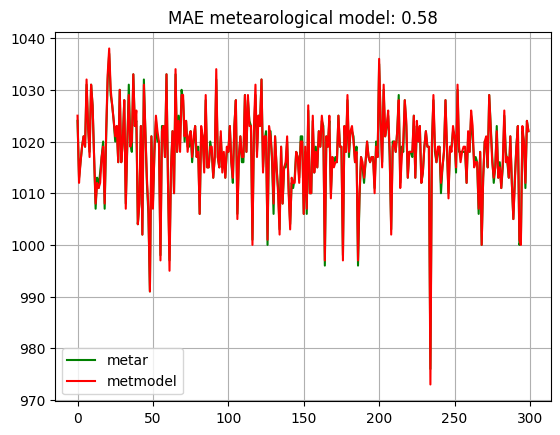

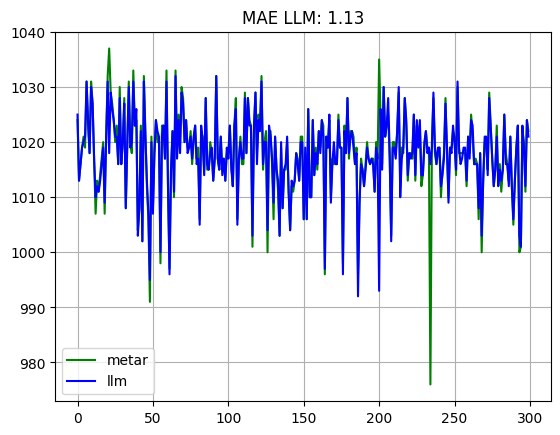

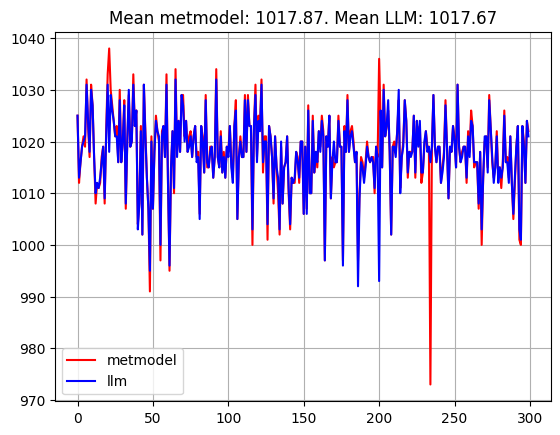

In [3]:
#@title QNH check

import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

score = []

def flatten_list(list_s):
  numbers = []
  for sublist in list_s:
      for item in sublist:
          # Check if the string after 'q' is not empty
          if len(item) > 1:
              num = item[1:]
              if num.isdigit():
                  numbers.append(int(num))


  return np.array(numbers)

df = pd.read_csv(result_path)
q_ytest = []
q_ypred = []
q_metmod =[]
for i in range(0,len(df)):
  q_ytest.append([word for word in df["y_test"][i].split() if 'q' in word.lower()])
  q_ypred.append([word for word in df["y_pred"][i].split() if 'q' in word.lower()][:1])
  q_metmod.append([word for word in df["all"][i].split() if 'q' in word.lower()][:1])

q_ypred_f = []

for sublist in q_ypred:
    if not sublist:  # Check if the sublist is empty
        q_ypred_f.append(["q0000"])
    else:
        q_ypred_f.append(sublist)  # Append the single string element


q_ypred_n = flatten_list(q_ypred_f)
q_test_n = flatten_list(q_ytest)
q_metmod_n = flatten_list(q_metmod)


#Show results
df_res = pd.DataFrame({"metar":q_test_n,"metmodel":q_metmod_n,"llm":q_ypred_n})

#avoid 0
df_res = df_res[df_res.llm!=0]
mae_llm = round((df_res['metar'] - df_res['llm']).abs().mean(),2)
mae_metmod = round(np.mean(np.abs(q_metmod_n - q_test_n)),2)

score.append(mae_llm)
score.append(mae_metmod)

df_res[["metar","metmodel"]].plot(grid=True, color=['green', 'red'],title="MAE metearological model: {}".format(mae_metmod));
df_res[["metar","llm"]].plot(grid=True, color=['green', 'blue'],title="MAE LLM: {}".format(mae_llm));
df_res[["metmodel","llm"]].plot(grid=True, color=['red', 'blue'],title="Mean metmodel: {}. Mean LLM: {}".format(round(q_metmod_n.mean(),2),round(df_res.llm.mean(),2)));

In [4]:
#@title wind check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 999

def contains_vrb(column):
    return column.str.contains('VRB', case=False, na=False)

def detect_wind_variation_test(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})V(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1

def detect_wind_variation_llm(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})v(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1


# Function to extract wind direction, speed, and gusts
def extract_wind_llm(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(vrb|\d{3})(\d{2})(g\d{2})?kt\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"


def extract_wind_test(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(VRB|\d{3})(\d{2})(G\d{2})?KT\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"

dirtest, modtest, gtest =[],[],[]
dirllm, modllm, gllm =[],[],[]

df = pd.read_csv(result_path)

for i in range(0,len(df)):
  wind_info_test = extract_wind_test(df["y_test"][i])
  wind_info_llm = extract_wind_llm(df["y_pred"][i])

  if isinstance(wind_info_test, tuple):
    dir, mod, gust = wind_info_test
    dirtest.append(dir)
    modtest.append(mod)
    gtest.append(gust)

  else:
    print(wind_info_test)
    dirtest.append(np.nan)
    modtest.append(np.nan)
    gtest.append(np.nan)

  if isinstance(wind_info_llm, tuple):
    dir, mod, gust = wind_info_llm
    dirllm.append(dir)
    modllm.append(mod)
    gllm.append(gust)

  else:
    print(wind_info_llm,i)
    dirllm.append(np.nan)
    modllm.append(np.nan)
    gllm.append(np.nan)

df["dirtest"]=dirtest
df["modtest"]=modtest
df["gtest"]=gtest

df["dirllm"]=dirllm
df["modllm"]=modllm
df["gllm"]=gllm

for i in range(0,len(df)):
  if "G" in str(df['gtest'][i]):
    df["gtest"][i]= int(df['gtest'][i][1:])

for i in range(0,len(df)):
  if "g" in str(df['gllm'][i]):
    df["gllm"][i]= int(df['gllm'][i][1:])

dirmetmod =[]
for i in range(0,len(df)):
  dirmetmod.append(int(df["all"][i].split()[0][:3]))
df["dirmetmod"] = dirmetmod

modmetmod =[]
for i in range(0,len(df)):
  modmetmod.append(int(df["all"][i].split()[0][3:5]))
df["modmetmod"] = modmetmod

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_test(df["y_test"][i]))
df["dirvartest"] = dirvar

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_llm(df["y_pred"][i]))
df["dirvarllm"] = dirvar
df.set_index("time")

#Analytics
mask_dirtest = contains_vrb(df['dirtest'])
mask_dirllm = contains_vrb(df['dirllm'])

# Combine the masks to filter rows
df_dir = df[~(mask_dirtest | mask_dirllm)][["dirtest","dirllm","dirmetmod"]].dropna().astype(int)

mae = int(np.mean(np.abs(df_dir['dirtest'] - df_dir['dirmetmod'])))
print(f"Mean Absolute Error (degrees) wind direction metmodel and metar: {mae}")
score.append(mae)
#MAE dir no vrb llm metar
mae = int((np.mean(np.abs(df_dir['dirtest'] - df_dir['dirllm']))))
print(f"Mean Absolute Error (degrees) wind direction llm and metar: {mae}")
score.append(mae)
df_mod= df[['modmetmod',"modtest","modllm"]].dropna().astype(int)

mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modmetmod'])),2)
print(f"Mean Absolute Error (Kt) wind intensity metmodel and metar: {mae}")
score.append(mae)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modllm'])),2)
print(f"Mean Absolute Error (kt) wind intensity llm and metar: {mae}")
score.append(mae)

dirvary = sum([1 if (df["dirvarllm"][c][0]!=-1) & (df["dirvartest"][c][0]!=-1) else 0 for c in range(0,len(df))])
dirvarn = sum([1 if (df["dirvarllm"][c][0]==-1) & (df["dirvartest"][c][0]==-1) else 0 for c in range(0,len(df))])
print("Both metar and forecast direction variation:", round(dirvary/len(df),2))
print("Both metar and forecast no direction variation:",round(dirvarn/len(df),2))
print("No match between metar and forecast:", round((len(df)-dirvary-dirvarn)/len(df),2))

display(df.set_index("time")[["dirtest","dirllm","dirmetmod","dirvartest","dirvarllm", "modtest",	"modmetmod","modllm","gtest","gllm"]].head(20))

Wind information not found 67
Mean Absolute Error (degrees) wind direction metmodel and metar: 54
Mean Absolute Error (degrees) wind direction llm and metar: 53
Mean Absolute Error (Kt) wind intensity metmodel and metar: 2.3
Mean Absolute Error (kt) wind intensity llm and metar: 2.42
Both metar and forecast direction variation: 0.41
Both metar and forecast no direction variation: 0.3
No match between metar and forecast: 0.29


,dirtest,dirllm,dirmetmod,dirvartest,dirvarllm,modtest,modmetmod,modllm,gtest,gllm
time,,,,,,,,,,
2021-12-16 02:00:00,180,180,150,"(-1, -1)","(150, 210)",06,7,05,0,0
2022-06-19 14:00:00,320,330,300,"(290, 020)","(290, 020)",16,15,13,28,0
2018-07-29 03:00:00,160,170,190,"(130, 240)","(-1, -1)",04,5,05,0,0
2019-07-16 01:00:00,360,360,360,"(330, 050)","(320, 050)",08,5,05,0,0
2019-07-17 23:00:00,VRB,vrb,320,"(-1, -1)","(-1, -1)",02,1,01,0,0
2019-10-22 06:00:00,180,160,160,"(-1, -1)","(-1, -1)",04,3,04,0,0
2019-01-01 07:00:00,190,vrb,250,"(-1, -1)","(-1, -1)",04,1,02,0,0
2022-11-04 05:00:00,VRB,310,280,"(-1, -1)","(230, 010)",01,5,03,0,0
2018-10-18 09:00:00,030,010,20,"(330, 060)","(310, 060)",06,7,05,0,0


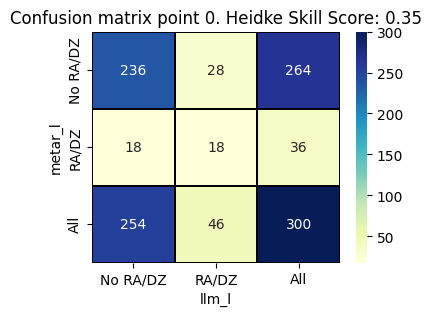

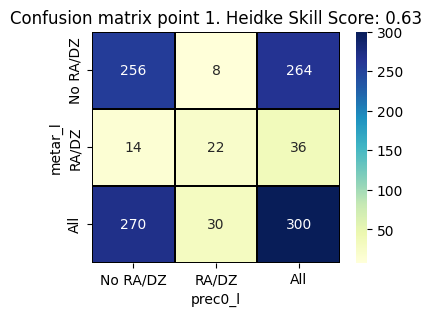

In [5]:
#@title Precipitation check

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
df = pd.read_csv(result_path)

df["metar_l"] = "No RA/DZ"
mask = df['y_test'].str.contains("RA")
df.loc[mask,["metar_l"]] = "RA/DZ"
mask = df['y_test'].str.contains("DZ")
df.loc[mask,["metar_l"]] = "RA/DZ"

df["llm_l"] = "No RA/DZ"
mask = df['y_pred'].str.contains("ra")
df.loc[mask,["llm_l"]] = "RA/DZ"
mask = df['y_pred'].str.contains("dz")
df.loc[mask,["llm_l"]] = "RA/DZ"

df["prec0_l"] = "No RA/DZ"
mask = df['all'].str.contains("prec0y")
df.loc[mask,["prec0_l"]] = "RA/DZ"

# Confussion matrix and Heidke skill score
cm0 = pd.crosstab(df.metar_l, df.llm_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

cm1 = pd.crosstab(df.metar_l, df.prec0_l,margins=True)
a = cm1.values[0,0]
b = cm1.values[1,0]
c = cm1.values[0,1]
d = cm1.values[1,1]
HSS1 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS1)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 1. Heidke Skill Score: {}".format(HSS1))
seab1 = sns.heatmap(cm1,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()


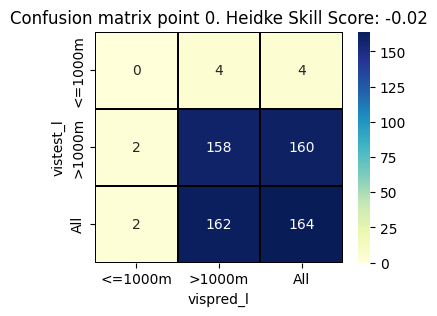

In [6]:
#@title Visibility check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

def extract_visibility(metar):
    # Check if 'CAVOK' is in the METAR report
    if 'CAVOK' in metar:
        return '9999'
    if "cavok" in metar:
        return "9999"
    # Define a regex pattern for visibility
    visibility_pattern = r'\b(\d{4}|(\d+/\d+)?SM)\b'

    # Search for the visibility in the METAR report
    match = re.search(visibility_pattern, metar)
    if match:
        return int(match.group(0))
    else:
        return "Visibility information not found"

df = pd.read_csv(result_path)

vistest = []
vispred = []
for i in range(0,len(df)):
  vistest.append(extract_visibility(df["y_test"][i]))
  vispred.append(extract_visibility(df["y_pred"][i]))

df["vistest"]= vistest
df["vispred"]= vispred
df[['y_test', 'y_pred', 'all', 'vistest', 'vispred']]


#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<=1000m', '>1000m']
df["vistest_l"] = pd.cut(df["vistest"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df["vispred_l"] = pd.cut(df["vispred"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")

cm0 = pd.crosstab(df.vistest_l, df.vispred_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

In [7]:
#@title Temperature check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_temperature_test(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(M?\d{2})/(M?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'M' in temperature:
            temperature = -int(temperature.replace('M', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


def extract_temperature_llm(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(m?\d{2}) (m?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'm' in temperature:
            temperature = -int(temperature.replace('m', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


templlm,tempmetar,tempmetmod, tempmetmodraw =[],[],[],[]
for i in range (0,len(df)):
  tempmetar.append(extract_temperature_test(df["y_test"][i]))
  templlm.append(extract_temperature_llm(df["y_pred"][i]))
  tempmetmodraw.append(df["all"][i].split()[5])

tempmetmod = [-int(temperature.replace('M', '')) if 'M' in temperature else int(temperature) for temperature in tempmetmodraw]
df_temp=pd.DataFrame({"tempmetar":tempmetar,"templlm":templlm,"tempmetmod":tempmetmod}).dropna()


mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['tempmetmod'])),2)
std = round((df_temp['tempmetar'] - df_temp['tempmetmod']).std(),2)
print(f"Mean Absolute Error (degrees) temperature metmodel and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature metmodel and metar: {std}")
score.append(mae)
score.append(std)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['templlm'])),2)
std = round((df_temp['tempmetar'] - df_temp['templlm']).std(),2)
print(f"Mean Absolute Error temperature (degreees) llm and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature LLM and metar: {std}")
score.append(mae)
score.append(std)
df_temp.head(20)

Mean Absolute Error (degrees) temperature metmodel and metar: 1.56
Standard desviation differences (degrees) temperature metmodel and metar: 2.05
Mean Absolute Error temperature (degreees) llm and metar: 1.42
Standard desviation differences (degrees) temperature LLM and metar: 1.93


,tempmetar,templlm,tempmetmod
0,6,8.0,9
1,15,14.0,15
2,14,14.0,13
3,17,17.0,15
4,16,12.0,12
5,3,8.0,6
6,2,6.0,6
7,12,13.0,13
8,16,17.0,16
9,17,18.0,17


In [8]:
#@title Save score

df_score = pd.DataFrame(score,index=["MAE_QNH_llm","MAE_QNH_metmodel","MAE_dir_metmodel",
                          "MAE_dir_llm","MAE_wind_int_metmodel","MAE_wind_int_llm",
                          "HSS_prec_llm","HSS_prec_metmodel","HHS_vis_llm","MAE_temp_metmodel","Std_temp_diff_metmodel",
                          "MAE_temp_llm","Std_temp_diff_metmodel"], columns=["Score"])
score_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LECO/LECOscore.csv"
df_score.to_csv(score_path)

In [9]:
df_score

,Score
MAE_QNH_llm,1.13
MAE_QNH_metmodel,0.58
MAE_dir_metmodel,54.00
MAE_dir_llm,53.00
MAE_wind_int_metmodel,2.30
MAE_wind_int_llm,2.42
HSS_prec_llm,0.35
HSS_prec_metmodel,0.63
HHS_vis_llm,-0.02
MAE_temp_metmodel,1.56
